<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/sentimentos/analise_with_vicuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!nvidia-smi

Wed Dec 13 01:49:47 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.02              Driver Version: 545.29.02    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti     Off | 00000000:08:00.0  On |                  N/A |
|  0%   35C    P8              16W / 285W |    664MiB / 12282MiB |     33%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
date = '2023-09-01'
filename = 'analisar.csv'
original = pd.read_csv(f"/content/gdrive/MyDrive/tcc/exploratoria/{date}-{filename}")

original.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
12006,2023-07-07 00:44:37.334068,5.0,um ano atrás,1,False,Ótimo. Não tem o que reclamar. Só elogios em t...,la-torre-resort-all-inclusive,77,2022-07-07,7,2022,2022-07,True,True,False,True,True
26916,2023-07-07 00:40:40.382635,5.0,10 meses atrás,0,False,"Queria agradecer a todos do hotel l, recepção ...",cana-brava-all-inclusive-resort,9,2022-09-10,9,2022,2022-09,True,True,False,True,True
43916,2023-07-07 01:09:00.506170,3.0,4 anos atrás,1,False,"Preciso saber ao certo como é esse resort x, v...",iberostar-bahia,Um,2019-07-08,7,2019,2019-07,True,True,False,True,True
24259,2023-07-07 00:34:59.230777,5.0,um mês atrás,0,False,Excelente!! Super indicado!! A barmen Fhainna ...,cana-brava-all-inclusive-resort,Um,2023-06-07,6,2023,2023-06,True,True,False,True,True
4468,2023-07-07 00:54:35.668036,5.0,um ano atrás,1,False,Ficamos 5 dias... Já estamos com saudades. O l...,salinas-maceió-all-inclusive-resort,14,2022-07-07,7,2022,2022-07,True,True,False,True,True


In [ ]:
# treinado = pd.read_csv(f"/content/gdrive/MyDrive/tcc/testando-classificacao.csv")

# treinado.sample(5)

In [3]:
bert = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_v2.csv", index_col = 0)

bert.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
2604,2023-07-07 00:56:10.152937,5.0,um ano atrás,0,False,Bom dia Eu consigo fazer uma reserva diretamen...,transamerica-comandatuba,9,2022-07-07,7,...,True,True,"{'label': 'negative', 'score': 0.8328699469566...","{'label': 'positive', 'score': 0.3924448788166...","{'label': 'Neutral', 'score': 0.9847399592399597}","{'label': 'neutral', 'score': 0.8235430121421814}","{'label': 'Neutro', 'score': 0.6045964360237122}","[{'label': 'Neutral', 'score': 0.9847399592399...","['neutral', 'negative', 'neutro', 'positive']","{0.9847399592399597, 0.8328699469566345, 0.392..."
31935,2023-07-07 00:33:56.970245,5.0,5 dias atrás,0,False,Perfeito!!! Super aconchegante é vista liiinda...,hotel-vila-galé-marés,2,2023-07-02,7,...,True,True,"{'label': 'positive', 'score': 0.99309903383255}","{'label': 'positive', 'score': 0.9437412023544...","{'label': 'Positive', 'score': 0.9924489259719...","{'label': 'positive', 'score': 0.9413893818855...","{'label': 'Muito Positivo', 'score': 0.8669627...","[{'label': 'positive', 'score': 0.993099033832...","['positive', 'muito positivo']","{0.99309903383255, 0.9924489259719849, 0.86696..."
25707,2023-07-07 00:38:04.446311,5.0,6 meses atrás,0,False,O resort é top. Os tios da recreação são tops ...,cana-brava-all-inclusive-resort,5,2023-01-08,1,...,True,True,"{'label': 'positive', 'score': 0.956604540348053}","{'label': 'positive', 'score': 0.8773177862167...","{'label': 'Positive', 'score': 0.9890916347503...","{'label': 'positive', 'score': 0.8801707625389...","{'label': 'Muito Positivo', 'score': 0.9151693...","[{'label': 'Positive', 'score': 0.989091634750...","['positive', 'muito positivo']","{0.9890916347503662, 0.956604540348053, 0.8773..."
32560,2023-07-07 00:35:22.423386,5.0,3 meses atrás,0,False,Nao podia deixar de ressaltar o atendimento do...,hotel-vila-galé-marés,Um,2023-04-08,4,...,True,True,"{'label': 'positive', 'score': 0.9790447354316...","{'label': 'positive', 'score': 0.7533985376358...","{'label': 'Positive', 'score': 0.9829972982406...","{'label': 'positive', 'score': 0.8608890771865...","{'label': 'Muito Positivo', 'score': 0.7475230...","[{'label': 'Positive', 'score': 0.982997298240...","['positive', 'muito positivo']","{0.9829972982406616, 0.9790447354316711, 0.747..."
4216,2023-07-07 00:54:01.201599,5.0,um ano atrás,0,False,Excelente nota 10,salinas-maceió-all-inclusive-resort,7,2022-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9827917218208...","{'label': 'positive', 'score': 0.951403796672821}","{'label': 'Positive', 'score': 0.9914436936378...","{'label': 'positive', 'score': 0.8862677216529...","{'label': 'Muito Positivo', 'score': 0.9468554...","[{'label': 'Positive', 'score': 0.991443693637...","['positive', 'muito positivo']","{0.9914436936378479, 0.9827917218208313, 0.886..."


In [112]:
gpt = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_gpt.csv", index_col = 0)
gpt = gpt.rename(columns={"tokens": "tokens_gpt"})
gpt = gpt.reset_index(drop=True)
gpt.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
6917,2023-07-07 00:35:28.328310,5.0,um ano atrás,0,False,Lindo!,hotel-vila-galé_-eco-resort---cabo,4,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,95
12570,2023-07-07 00:46:05.388136,5.0,3 anos atrás,0,True,Muito bom e aconchegante petiscos deliciosos,la-torre-resort-all-inclusive,49,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,108
26468,2023-07-07 00:39:42.185620,5.0,9 meses atrás,0,False,Cana Adventure pessoal muito top top,cana-brava-all-inclusive-resort,Um,2022-10-10,10,2022,2022-10,True,True,False,True,True,positive,2,101
33197,2023-07-07 00:36:55.622587,1.0,um ano atrás,0,True,"Atendimento ruim, os funcionários não sabem da...",hotel-vila-galé-marés,21,2022-07-07,7,2022,2022-07,True,True,False,True,True,negative,0,128
38638,2023-07-07 00:44:15.528912,5.0,um ano atrás,0,False,Excelente hotel!,iberostar-bahia,Um,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,96


In [113]:
vicuna = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_vicuna.csv", index_col = 0)
vicuna = vicuna.rename(columns={"sentimento_gpt": "sentimento_vicuna", "resultado_gpt":  "resultado_vicuna", "tokens": "tokens_vicuna"})
vicuna = vicuna.reset_index(drop=True)
vicuna.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens_vicuna
32443,2023-07-07 00:35:06.574497,5.0,3 meses atrás,0,False,Estava piscina por volta de 17h30 ao entrar no...,hotel-vila-galé-marés,Um,2023-04-08,4,2023,2023-04,True,True,False,True,True,positive,2,188
9384,2023-07-07 00:47:25.934423,5.0,6 meses atrás,0,False,Minha primeira experiência em um hotel all inc...,nauticomar-resort-all-inclusive-_-beach-club,2,2023-01-08,1,2023,2023-01,True,True,False,True,True,positive,2,257
38881,2023-07-07 00:45:01.213090,5.0,um ano atrás,0,False,Muito bom! Funcionários maravilhosos e o melho...,iberostar-bahia,Um,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,166
46283,2023-07-07 00:55:15.374140,5.0,um ano atrás,0,False,"Experiência muito boa. Comida Boa, bebidas das...",salinas-maragogi-all-inclusive-resort,2,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,186
1701,2023-07-07 00:38:44.751519,5.0,5 anos atrás,0,True,Lugar maravilhosooo,hotel-marsol-beach-resort,25,2018-07-08,7,2018,2018-07,True,True,False,True,True,positive,2,145


In [6]:
original.shape

(49219, 17)

In [7]:
bert.shape

(49219, 25)

In [8]:
gpt.shape

(49219, 20)

In [104]:
vicuna.shape

(49219, 20)

In [51]:
values = original['text'].value_counts()
values[values < 5]

Ótimo lugar recomendo                                                                                                                                4
Está sendo ótima                                                                                                                                     4
Comida maravilhosa                                                                                                                                   4
Hotel excelente                                                                                                                                      4
Lindo.                                                                                                                                               4
                                                                                                                                                    ..
Melhor experiência que já vivi. Quartos: Não quero ir mais embora. Segurança: Sem me preocupar

In [52]:
texto_mascara = 'Ótimo lugar recomendo'

In [53]:
ocopy = original[original['text'] == texto_mascara].copy()

In [114]:
gcopy = gpt[gpt['text'] == texto_mascara].copy()

In [55]:
bcopy = bert[bert['text'] == texto_mascara].copy()

In [105]:
vcopy = vicuna[vicuna['text'] == texto_mascara].copy()

In [57]:
ocopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True


In [115]:
gcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,99
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,99


In [59]:
bcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."


In [106]:
vcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,142


In [61]:
original.shape

(49219, 17)

In [123]:
megazord_tmp = pd.merge(original, gpt, how='left')
megazord_tmp2 = pd.merge(megazord_tmp, bert, how='left')
megazord = pd.merge(megazord_tmp2, vicuna, how='left')

In [125]:
megazord = megazord.loc[:, ~megazord.columns.duplicated(keep='first')]

In [126]:
equal_columns = megazord.columns[megazord.nunique() == 1]

megazord = megazord.drop(columns=equal_columns)

# Reset index if needed
megazord = megazord.reset_index(drop=True)
megazord.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentimento_gpt', 'resultado_gpt', 'tokens_gpt', 'sentiment_bert_1',
       'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4',
       'sentiment_bert_5', 'sentiment_bert', 'sentiment_label',
       'sentiment_score', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna'],
      dtype='object')

In [127]:
megazord = megazord.reset_index(drop=True)

In [128]:
megazord[megazord['text'] == texto_mascara]

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score,sentimento_vicuna,resultado_vicuna,tokens_vicuna
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,"{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,"{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,"{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,"{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,142


In [130]:
megazord[megazord['text'] == 'Lugar fantástico, recomendo super.']

0    102
Name: tokens_gpt, dtype: int64

# 08

## bert pre treinado

In [131]:
PRE_TRAINED_MODEL_NAME_1 = 'philschmid/distilbert-base-multilingual-cased-sentiment'
PRE_TRAINED_MODEL_NAME_2 = 'lxyuan/distilbert-base-multilingual-cased-sentiments-student'
PRE_TRAINED_MODEL_NAME_3 = 'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned'
PRE_TRAINED_MODEL_NAME_4 = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
PRE_TRAINED_MODEL_NAME_5 = 'ramonmedeiro1/bertimbau-products-reviews-pt-br'
teste = megazord.copy()
MODELS = [PRE_TRAINED_MODEL_NAME_1,PRE_TRAINED_MODEL_NAME_2,PRE_TRAINED_MODEL_NAME_3,PRE_TRAINED_MODEL_NAME_4,PRE_TRAINED_MODEL_NAME_5]

GPT_LABEL = ['negative', 'neutral', 'positive', 'unknown']

translate = {"muito positivo": "positive", "muito negativo": "negative", "neutro": "neutral", "negativo": "negative", "positivo": "positive"}

In [132]:
translate['muito positivo']

'positive'

In [133]:
def traduzir_bert_5(row):
  row = ast.literal_eval(row)
  value = row['label'].lower()
  score = row['score']
  label = translate[value]
  return {'label': label, 'score': score}

def lower_bert_3(row):
  row = ast.literal_eval(row)
  label = row['label'].lower()
  score = row['score']
  return {'label': label, 'score': score}

In [134]:
import ast

def try_parse(x):
  if type(x) == str:
    return ast.literal_eval(x)
  return x

In [135]:
columns_to_transform = ['sentiment_bert_1','sentiment_bert_2','sentiment_bert_3','sentiment_bert_4','sentiment_bert_5']

In [136]:
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(traduzir_bert_5)
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lower_bert_3)

In [137]:
cols = columns_to_transform
teste['sentiment_bert_1'] = teste['sentiment_bert_1'].apply(lambda x: try_parse(x))
teste['sentiment_bert_2'] = teste['sentiment_bert_2'].apply(lambda x: try_parse(x))
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lambda x: try_parse(x))
teste['sentiment_bert_4'] = teste['sentiment_bert_4'].apply(lambda x: try_parse(x))
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(lambda x: try_parse(x))
teste['sentiment_bert'] = teste[cols].apply(lambda row: row.values.tolist(), axis=1)

In [138]:
teste[['sentiment_bert']].sample(10)

,sentiment_bert
27120,"[{'label': 'positive', 'score': 0.984622180461..."
32027,"[{'label': 'positive', 'score': 0.961581289768..."
38947,"[{'label': 'positive', 'score': 0.978975594043..."
11164,"[{'label': 'positive', 'score': 0.992233753204..."
15929,"[{'label': 'positive', 'score': 0.995469212532..."
44370,"[{'label': 'positive', 'score': 0.983180165290..."
31296,"[{'label': 'positive', 'score': 0.988219857215..."
23260,"[{'label': 'positive', 'score': 0.605091571807..."
32849,"[{'label': 'negative', 'score': 0.467601805925..."
27308,"[{'label': 'positive', 'score': 0.992590665817..."


In [139]:
try_parse(teste.iloc[40522]['sentiment_bert'])

[{'label': 'positive', 'score': 0.9965198040008545},
 {'label': 'positive', 'score': 0.9393256306648254},
 {'label': 'positive', 'score': 0.9923418760299683},
 {'label': 'positive', 'score': 0.931358277797699},
 {'label': 'positive', 'score': 0.9673769474029541}]

In [140]:
import numpy as np

teste['sentiment_bert_max'] = teste['sentiment_bert'].apply(lambda x: MODELS[np.argmax(list(map(lambda y: y['score'], x)))])

In [141]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [142]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

teste['sentiment_label'] = teste['sentiment_bert'].apply(lambda x: f7(list(map(lambda y: y['label'].lower(), x))))
teste['sentiment_score'] = teste['sentiment_bert'].apply(lambda x: set(map(lambda y: y['score'], x)))

In [143]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [144]:
teste['sentiment_label']

0                  [positive]
1        [positive, negative]
2                  [positive]
3                  [positive]
4                  [positive]
                 ...         
49214    [positive, negative]
49215     [positive, neutral]
49216              [positive]
49217              [positive]
49218              [positive]
Name: sentiment_label, Length: 49219, dtype: object

In [145]:
teste[teste.text == 'Lindo d mais']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score,sentimento_vicuna,resultado_vicuna,tokens_vicuna,sentiment_bert_max
5962,2023-07-07 00:59:10.935631,3.0,5 anos atrás,0,True,Lindo d mais,salinas-maceió-all-inclusive-resort,13,2018-07-08,7,...,"{'label': 'positive', 'score': 0.9915336966514...","{'label': 'positive', 'score': 0.8819499015808...","{'label': 'positive', 'score': 0.9520753026008...","[{'label': 'neutral', 'score': 0.4194217622280...","[neutral, positive]","{0.4194217622280121, 0.5910865664482117, 0.952...",positive,2,140,citizenlab/twitter-xlm-roberta-base-sentiment-...


In [146]:
def translate_bert_label(x):
  max_item = max(x, key=lambda x: x['score'])
  highest_score_label = max_item['label']
  return highest_score_label

In [147]:
data_sample = [{'label': 'positive', 'score': 0.8852595686912537}, {'label': 'Neutral', 'score': 0.7905126214027405}, {'label': 'Muito Positivo', 'score': 0.9027421951293945}, {'label': 'positive', 'score': 0.5404698252677917}, {'label': 'negative', 'score': 0.44150814414024353}]

In [148]:
translate_bert_label(data_sample)

'Muito Positivo'

In [171]:
teste['gpt_label'] = teste['resultado_gpt'].apply(lambda x: GPT_LABEL[x])
teste['vicuna_label'] = teste['resultado_vicuna'].apply(lambda x: GPT_LABEL[x])
teste['bert_label'] = teste['sentiment_bert'].apply(lambda x: translate_bert_label(x))
teste['citizenlab_bert_label'] = teste['sentiment_bert_3'].apply(lambda x: x['label'])
teste['philschmid_bert_label'] = teste['sentiment_bert_1'].apply(lambda x: x['label'])
teste['bert_gpt_match'] = teste['bert_label'] == teste['gpt_label']
teste['vicuna_gpt_match'] = teste['vicuna_label'] == teste['gpt_label']
teste['citizenlab_gpt_match'] = teste['citizenlab_bert_label'] == teste['gpt_label']
teste['philschmid_gpt_match'] = teste['philschmid_bert_label'] == teste['gpt_label']

In [165]:
# teste.to_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2023_12_12.csv')

In [ ]:
# teste = pd.read_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2023_10_31.csv', index_col=0)

In [156]:
teste.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentimento_gpt', 'resultado_gpt', 'tokens_gpt', 'sentiment_bert_1',
       'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4',
       'sentiment_bert_5', 'sentiment_bert', 'sentiment_label',
       'sentiment_score', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna', 'sentiment_bert_max', 'gpt_label', 'bert_label',
       'citizenlab_bert_label', 'philschmid_bert_label', 'bert_gpt_match',
       'citizenlab_gpt_match', 'philschmid_gpt_match', 'vicuna_label'],
      dtype='object')

<Axes: ylabel='gpt_label'>

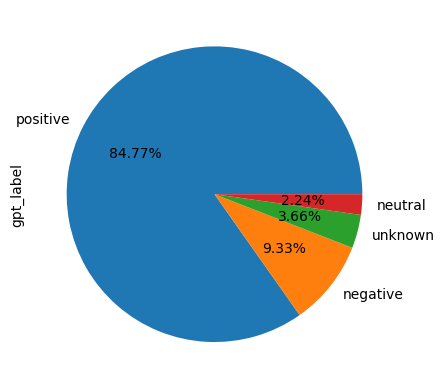

In [157]:
teste['gpt_label'].value_counts().plot.pie(y='gpt_label', autopct='%1.2f%%')

<Axes: ylabel='vicuna_label'>

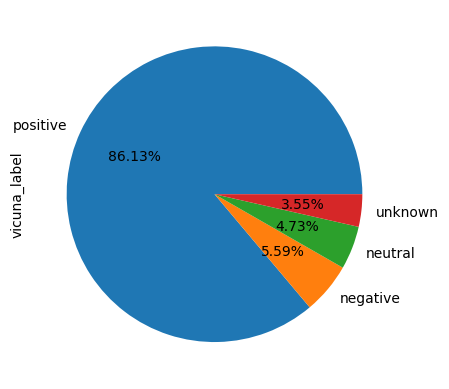

In [161]:
teste['vicuna_label'].value_counts().plot.pie(y='vicuna_label', autopct='%1.2f%%')

<Axes: ylabel='bert_label'>

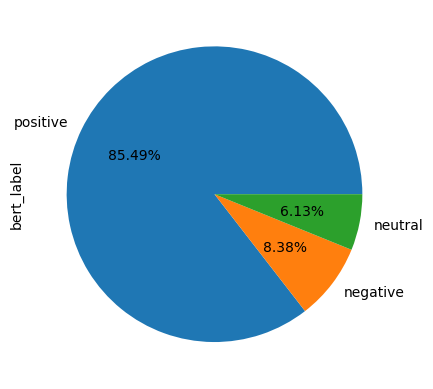

In [162]:
teste['bert_label'].value_counts().plot.pie(y='bert_label', autopct='%1.2f%%')

<Axes: ylabel='bert_gpt_match'>

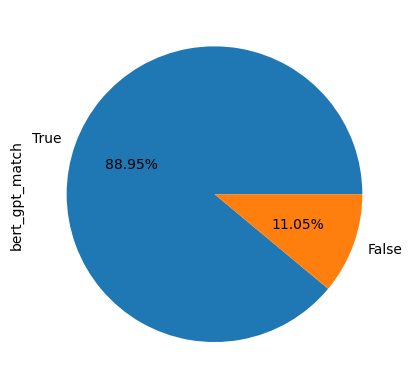

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

teste['bert_gpt_match'].value_counts().plot.pie(y='bert_gpt_match', autopct='%1.2f%%')

<Axes: ylabel='citizenlab_gpt_match'>

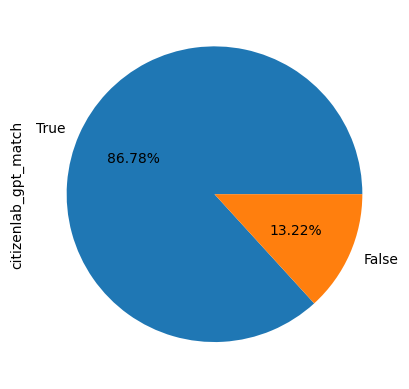

In [ ]:
teste['citizenlab_gpt_match'].value_counts().plot.pie(y='citizenlab_gpt_match', autopct='%1.2f%%')

<Axes: ylabel='philschmid_gpt_match'>

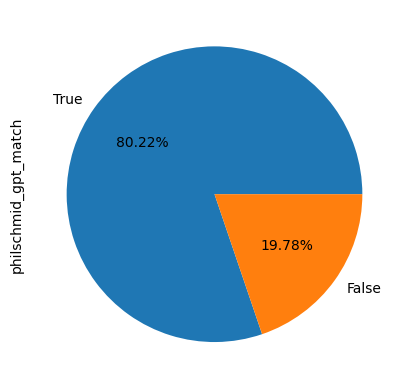

In [ ]:
teste['philschmid_gpt_match'].value_counts().plot.pie(y='philschmid_gpt_match', autopct='%1.2f%%')

<Axes: ylabel='vicuna_gpt_match'>

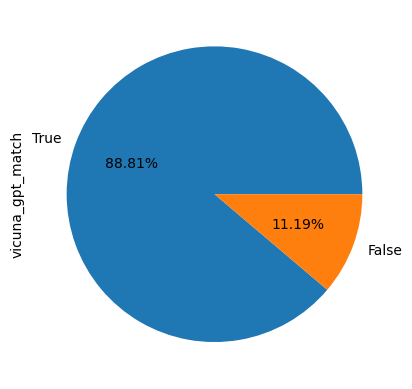

In [169]:
teste['vicuna_gpt_match'].value_counts().plot.pie(y='vicuna_gpt_match', autopct='%1.2f%%')

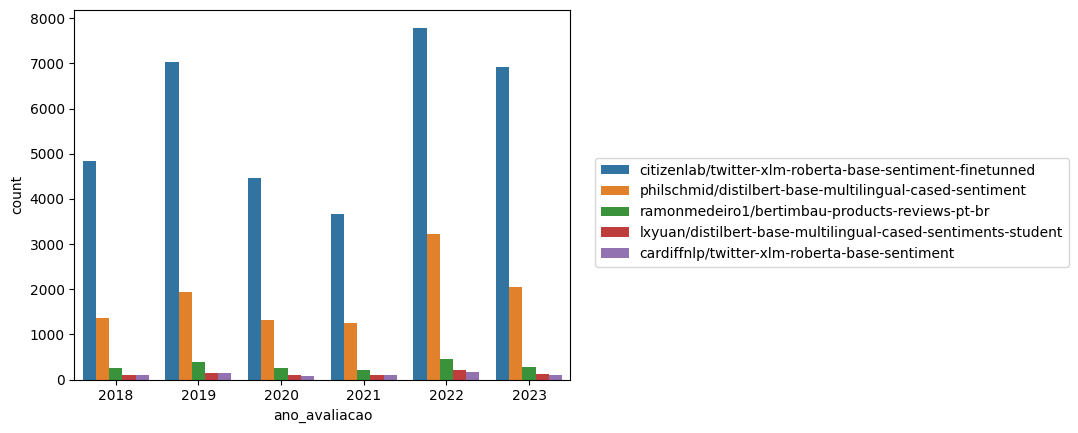

In [172]:
sns.countplot(x='ano_avaliacao',
              hue='sentiment_bert_max',
              data=teste)
plt.legend(bbox_to_anchor=(1.05, .6), loc='upper left', borderaxespad=0)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

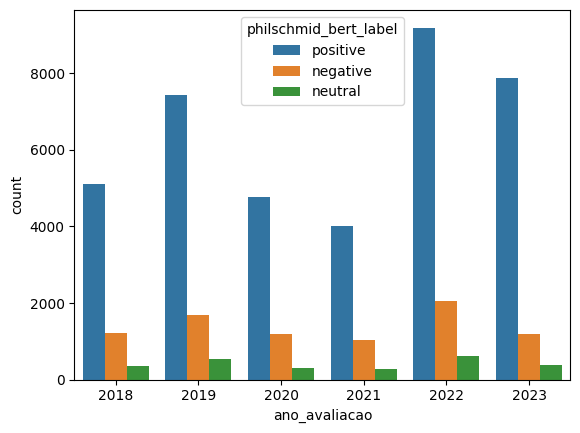

In [ ]:
sns.countplot(x='ano_avaliacao', hue='philschmid_bert_label', data=teste)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

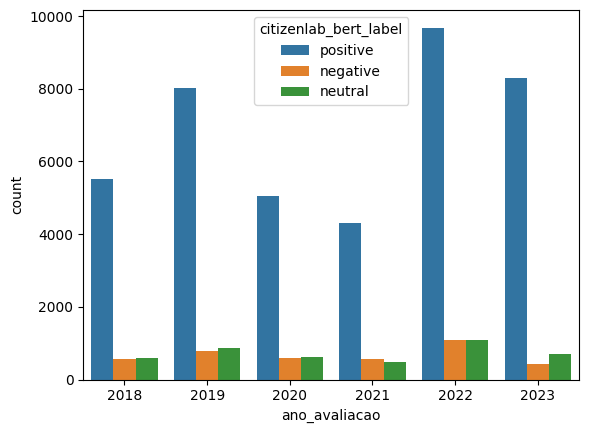

In [ ]:
sns.countplot(x='ano_avaliacao', hue='citizenlab_bert_label', data=teste)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

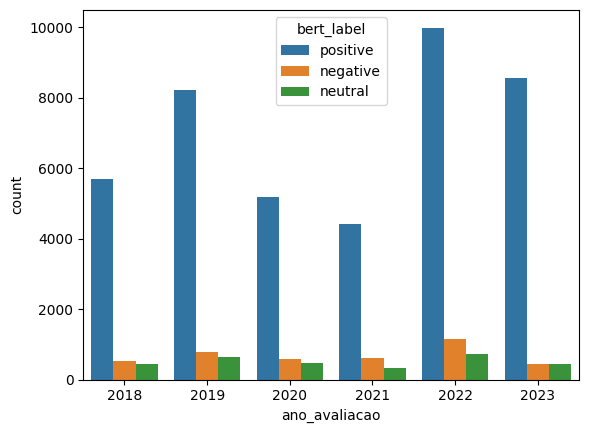

In [ ]:
sns.countplot(x='ano_avaliacao', hue='bert_label', data=teste)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

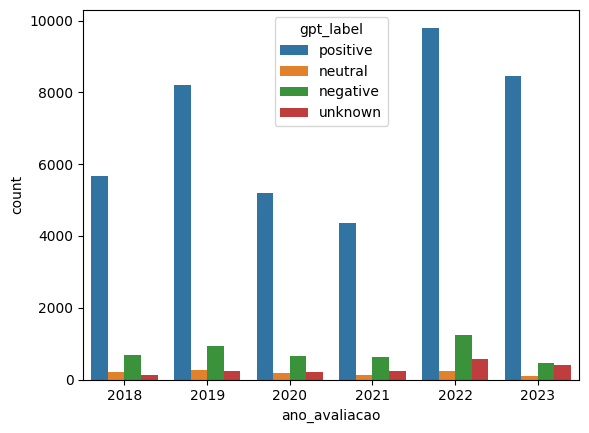

In [ ]:
sns.countplot(x='ano_avaliacao', hue='gpt_label', data=teste)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

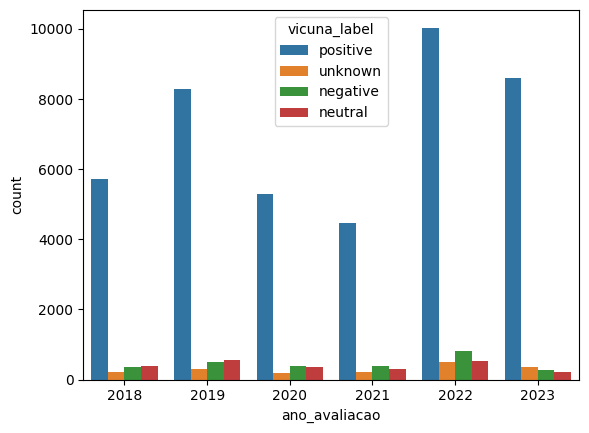

In [173]:
sns.countplot(x='ano_avaliacao', hue='vicuna_label', data=teste)

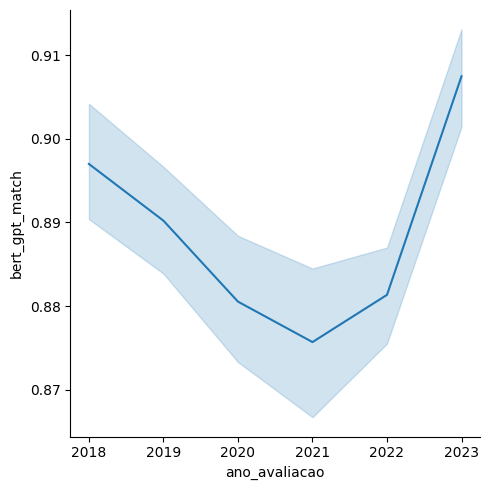

In [ ]:
sns.relplot(x='ano_avaliacao', y='bert_gpt_match', kind="line", data=teste)

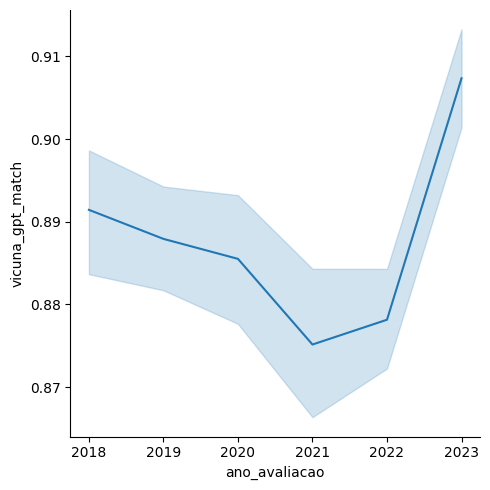

In [174]:
sns.relplot(x='ano_avaliacao', y='vicuna_gpt_match', kind="line", data=teste)

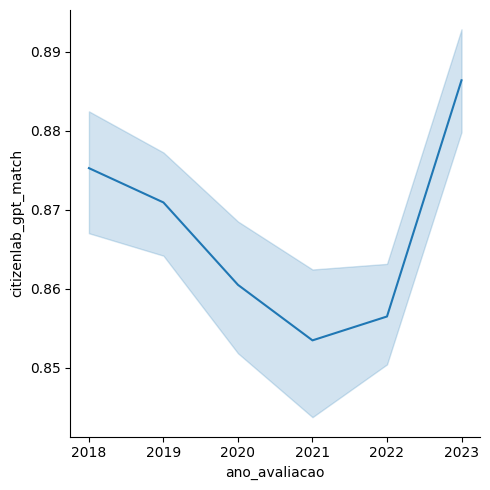

In [ ]:
sns.relplot(x='ano_avaliacao', y='citizenlab_gpt_match', kind="line", data=teste)

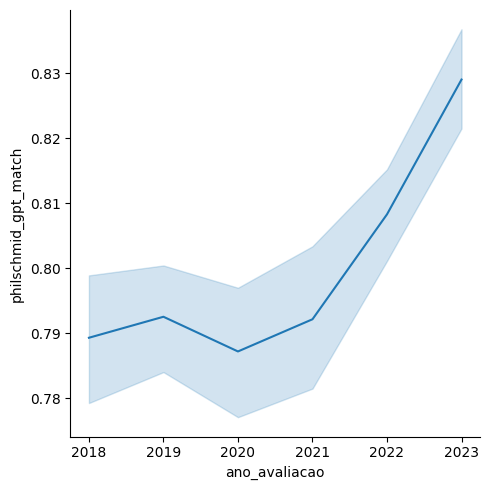

In [ ]:
sns.relplot(x='ano_avaliacao', y='philschmid_gpt_match', kind="line", data=teste)

<Axes: xlabel='bert_label', ylabel='gpt_label'>

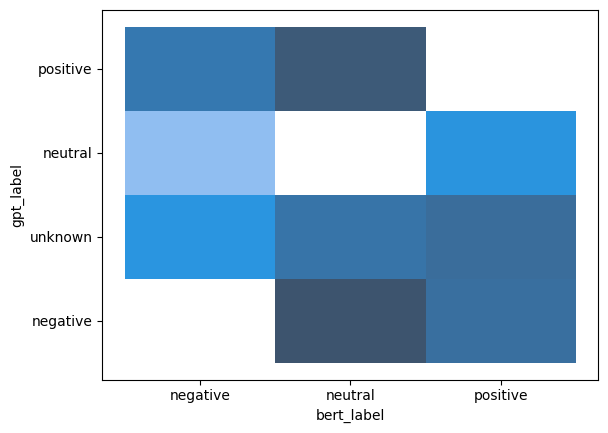

In [ ]:
sns.histplot(y='gpt_label', x='bert_label', data=teste[False == teste['bert_gpt_match']])

<Axes: xlabel='vicuna_label', ylabel='gpt_label'>

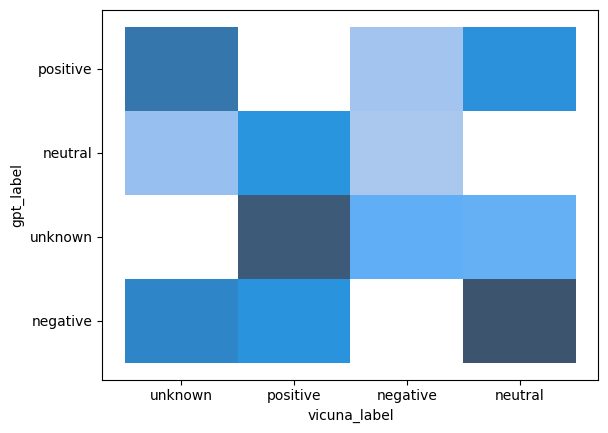

In [175]:
sns.histplot(y='gpt_label', x='vicuna_label', data=teste[False == teste['vicuna_gpt_match']])

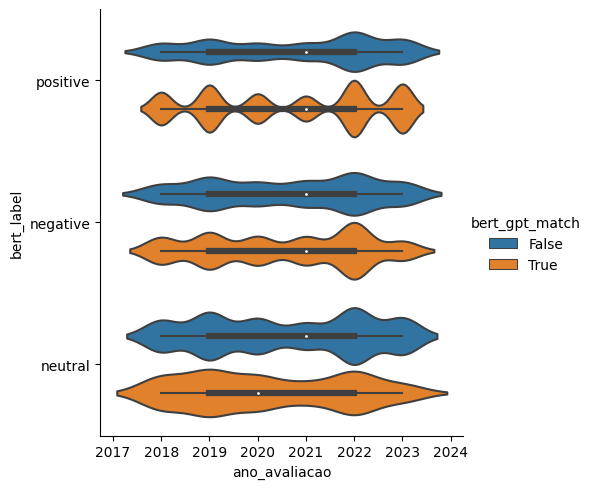

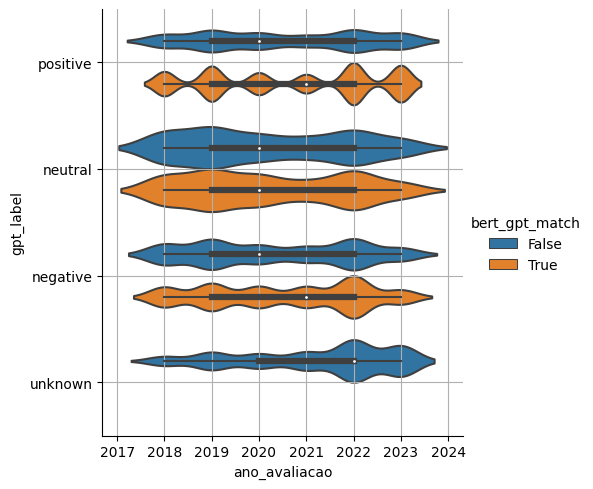

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(hue='bert_gpt_match', x='ano_avaliacao', y='bert_label', data=teste, kind='violin')
sns.catplot(hue='bert_gpt_match', x='ano_avaliacao', y='gpt_label', data=teste, kind='violin')
# sns.swarmplot(data=teste, x="ano_avaliacao", y="bert_gpt_match", size=3)
plt.grid(True)
plt.show()

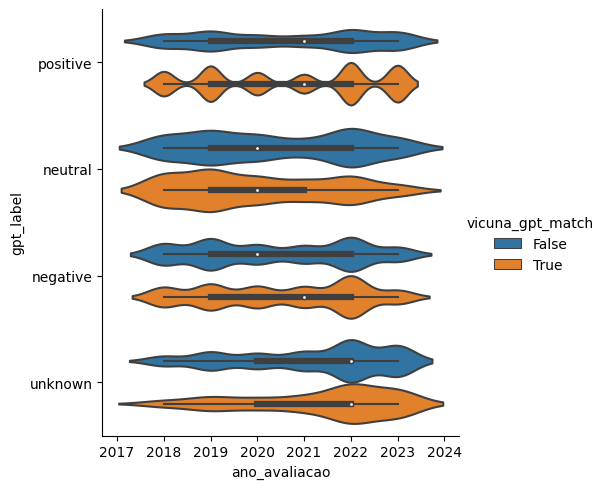

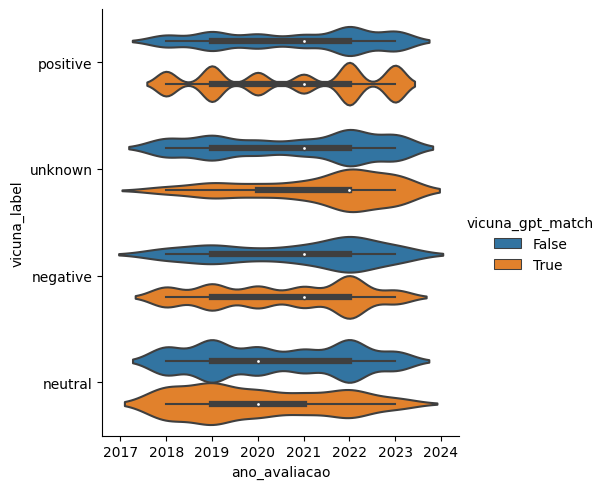

In [177]:
sns.catplot(hue='vicuna_gpt_match', x='ano_avaliacao', y='gpt_label', data=teste, kind='violin')
sns.catplot(hue='vicuna_gpt_match', x='ano_avaliacao', y='vicuna_label', data=teste, kind='violin')


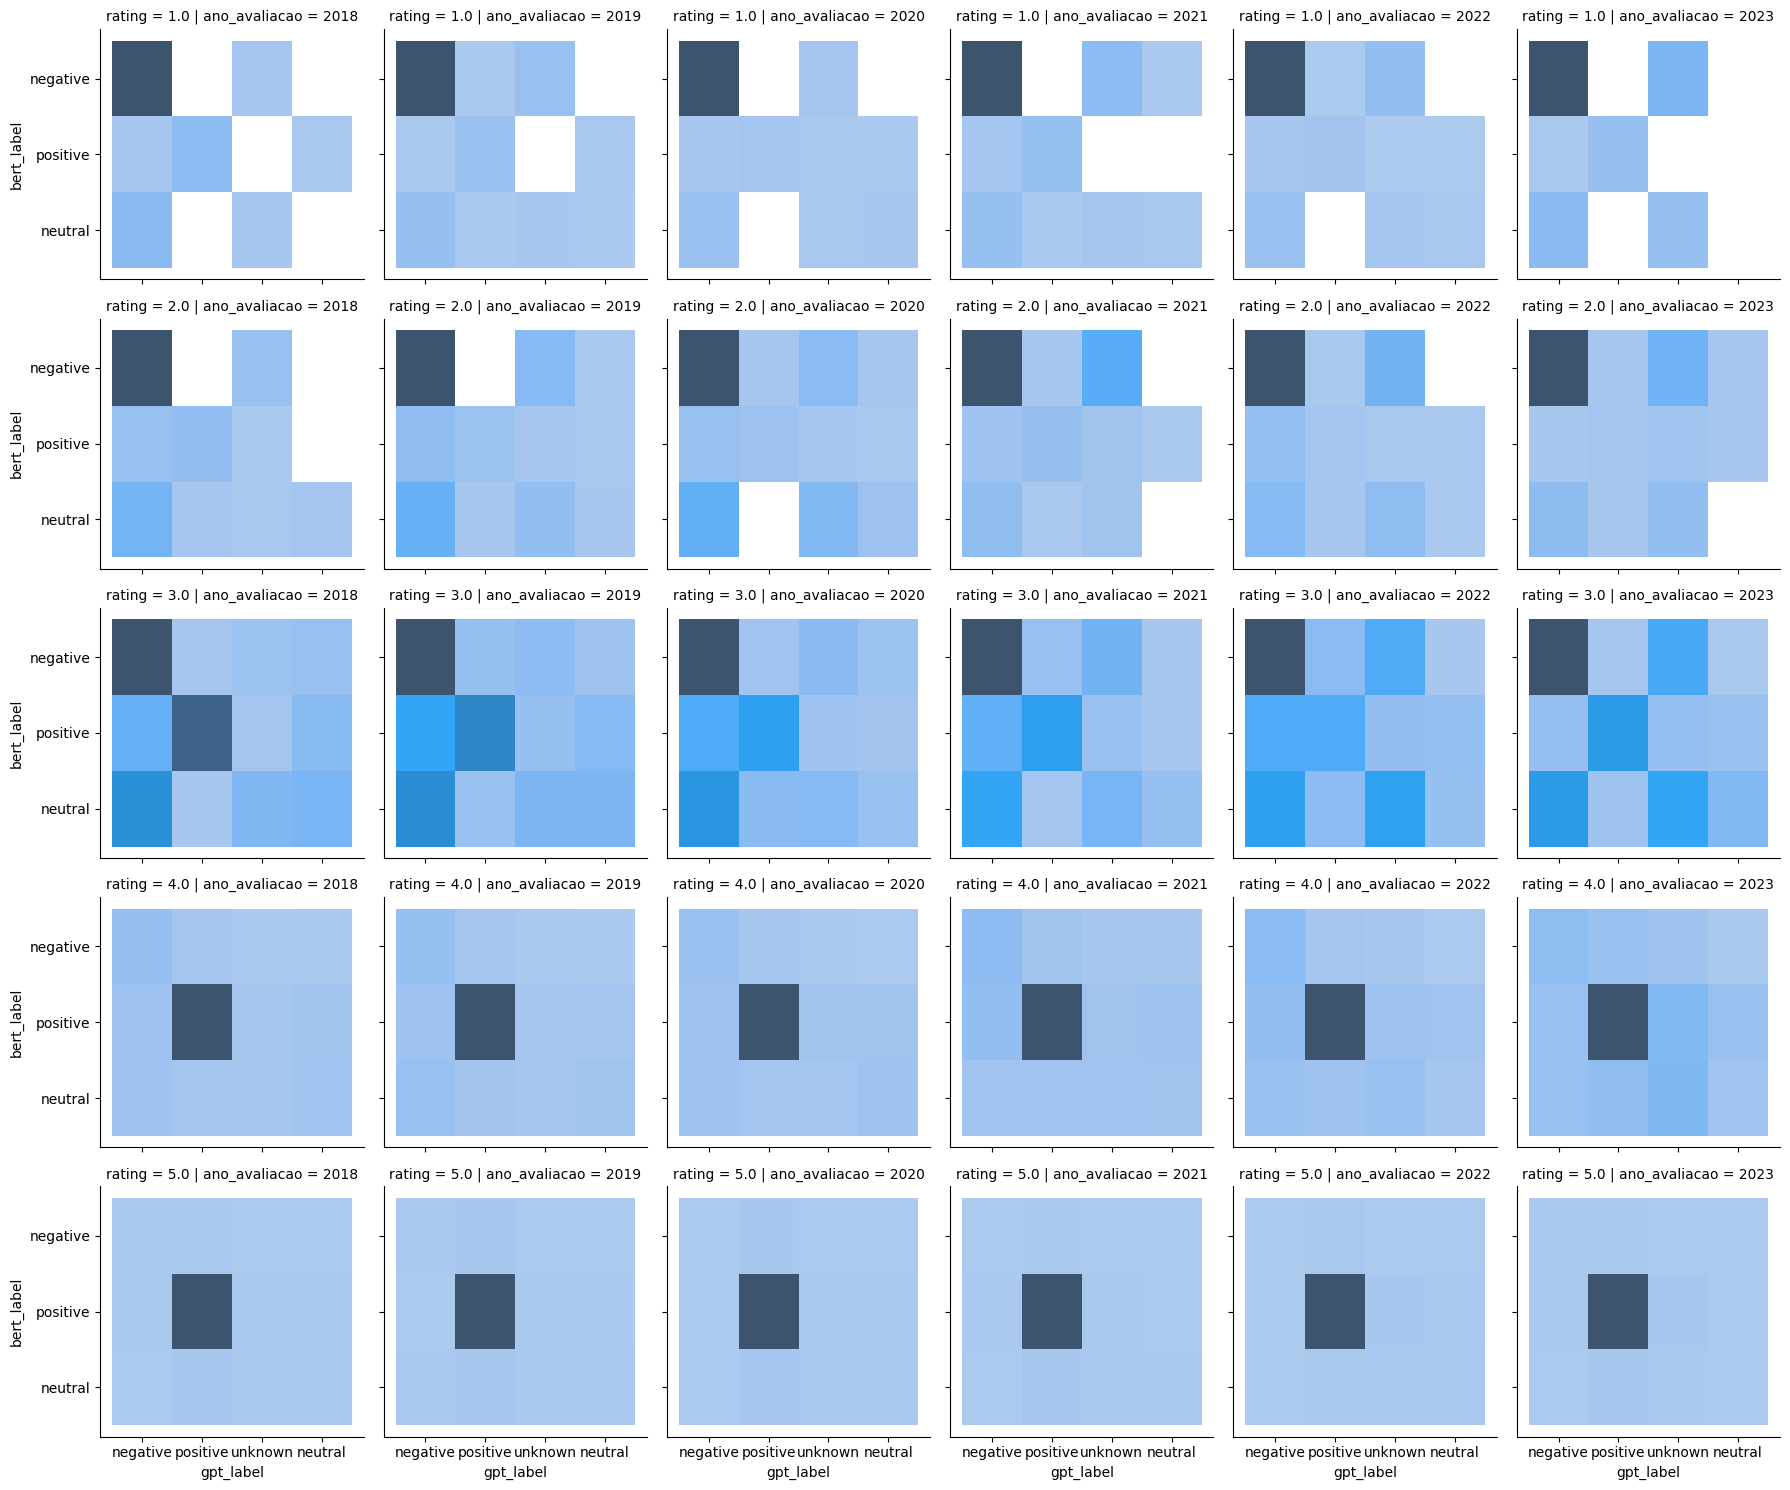

In [178]:
# sns.FacetGrid?

g = sns.FacetGrid(teste, col="ano_avaliacao", row="rating")
g.map_dataframe(sns.histplot, x="gpt_label", y='bert_label')

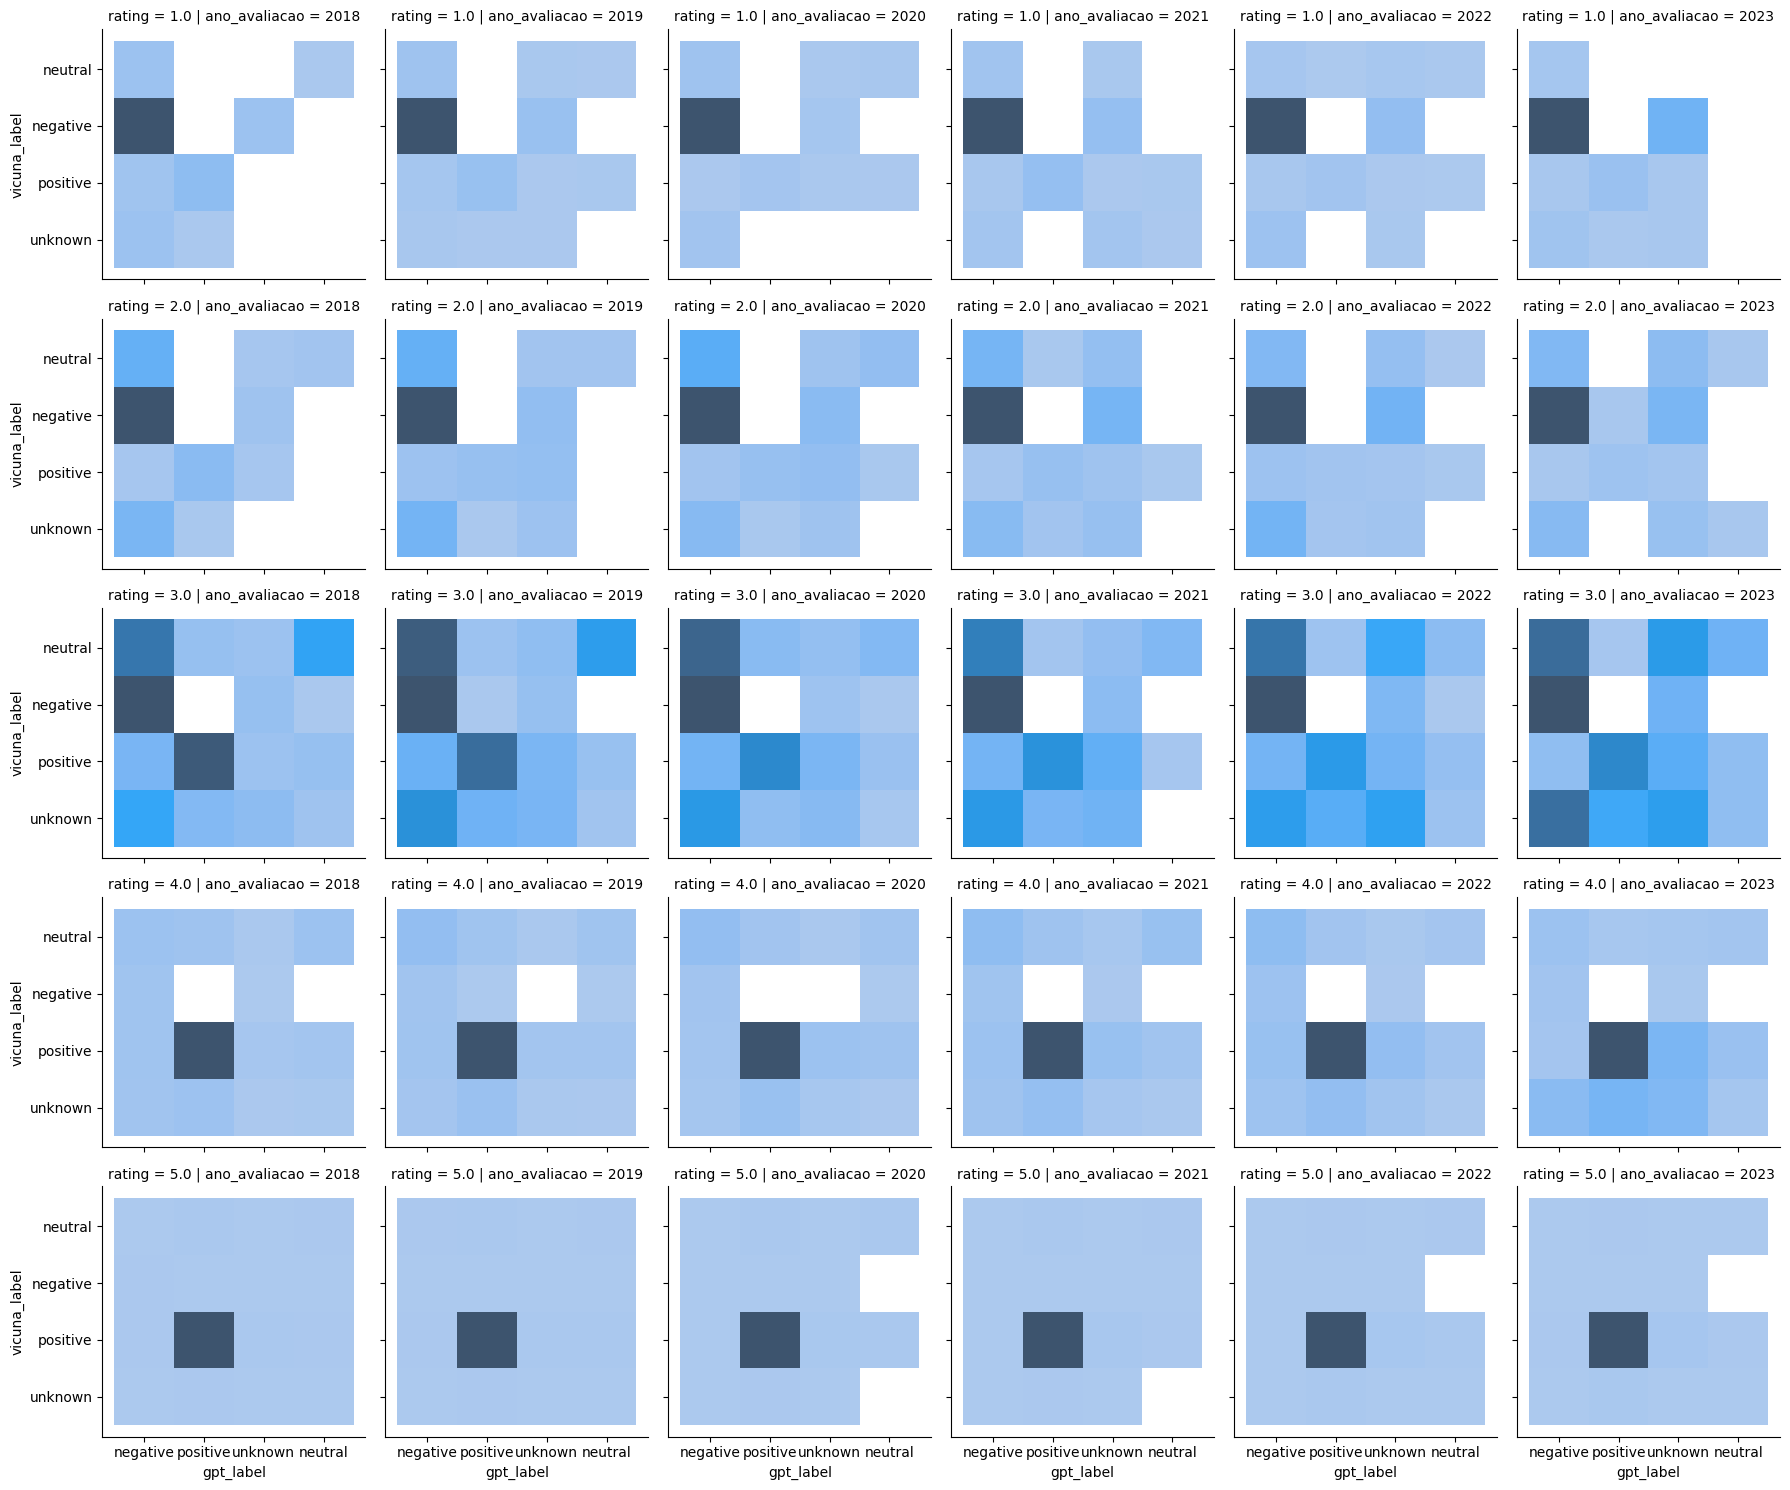

In [179]:
# sns.FacetGrid?

g = sns.FacetGrid(teste, col="ano_avaliacao", row="rating")
g.map_dataframe(sns.histplot, x="gpt_label", y='vicuna_label')

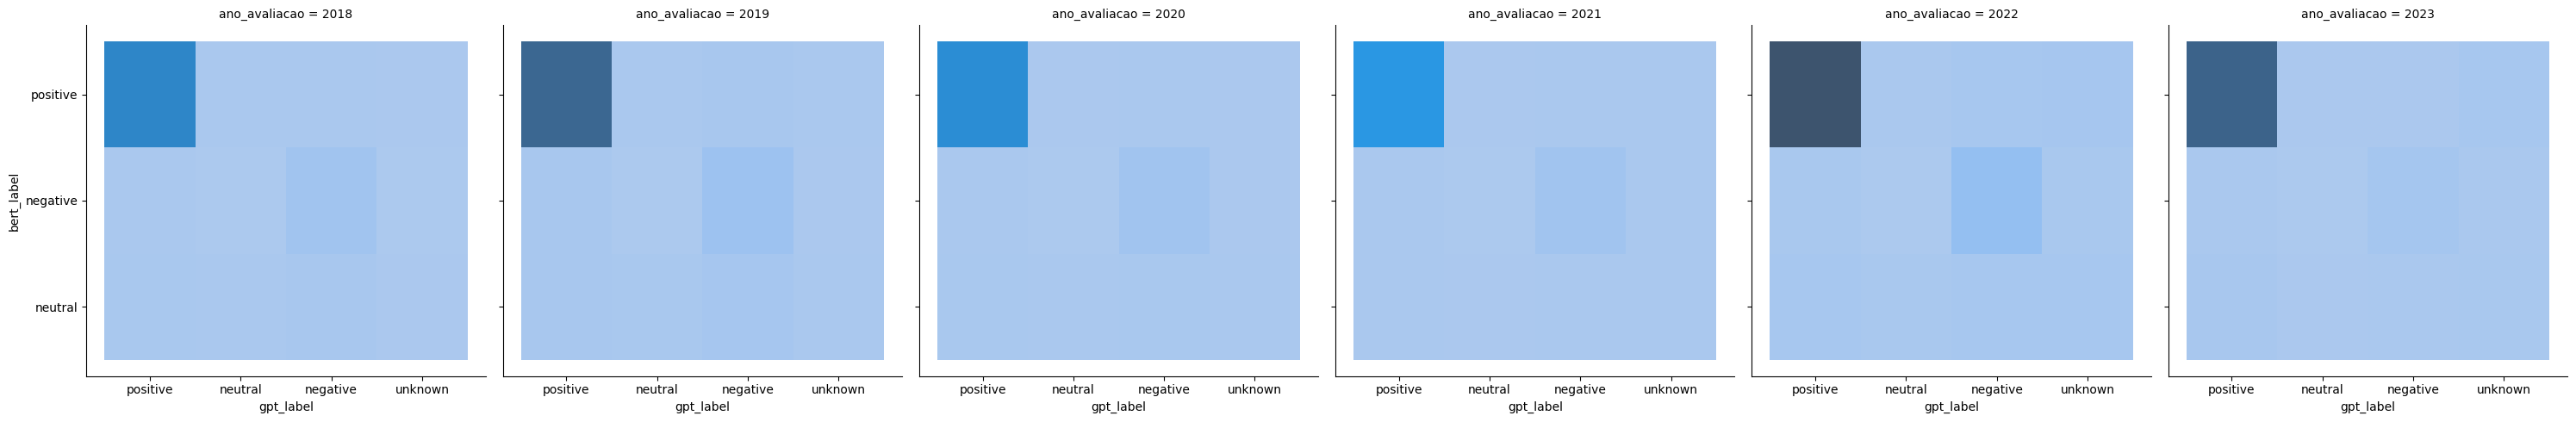

In [180]:
sns.displot(x='gpt_label', y='bert_label', col='ano_avaliacao', data=teste)

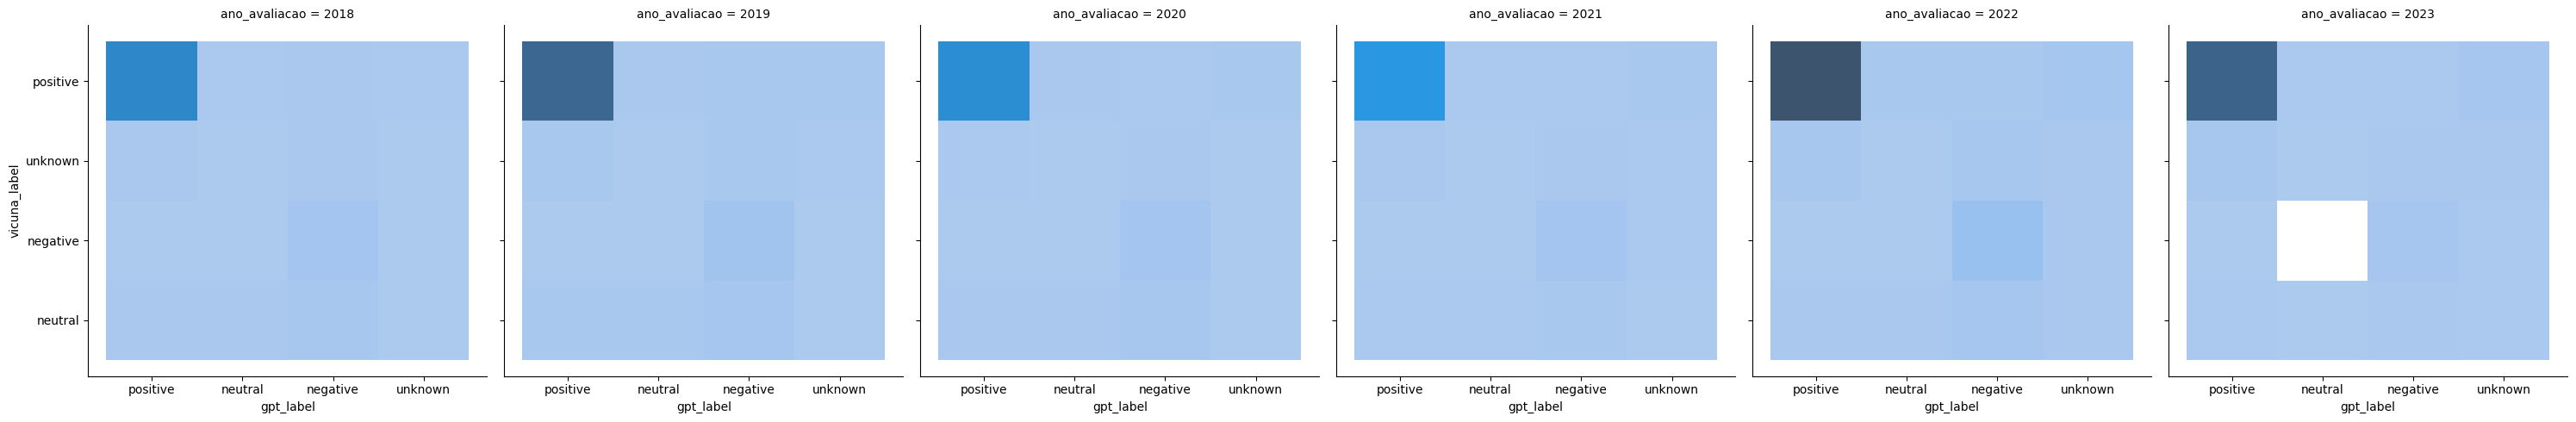

In [181]:
sns.displot(x='gpt_label', y='vicuna_label', col='ano_avaliacao', data=teste)

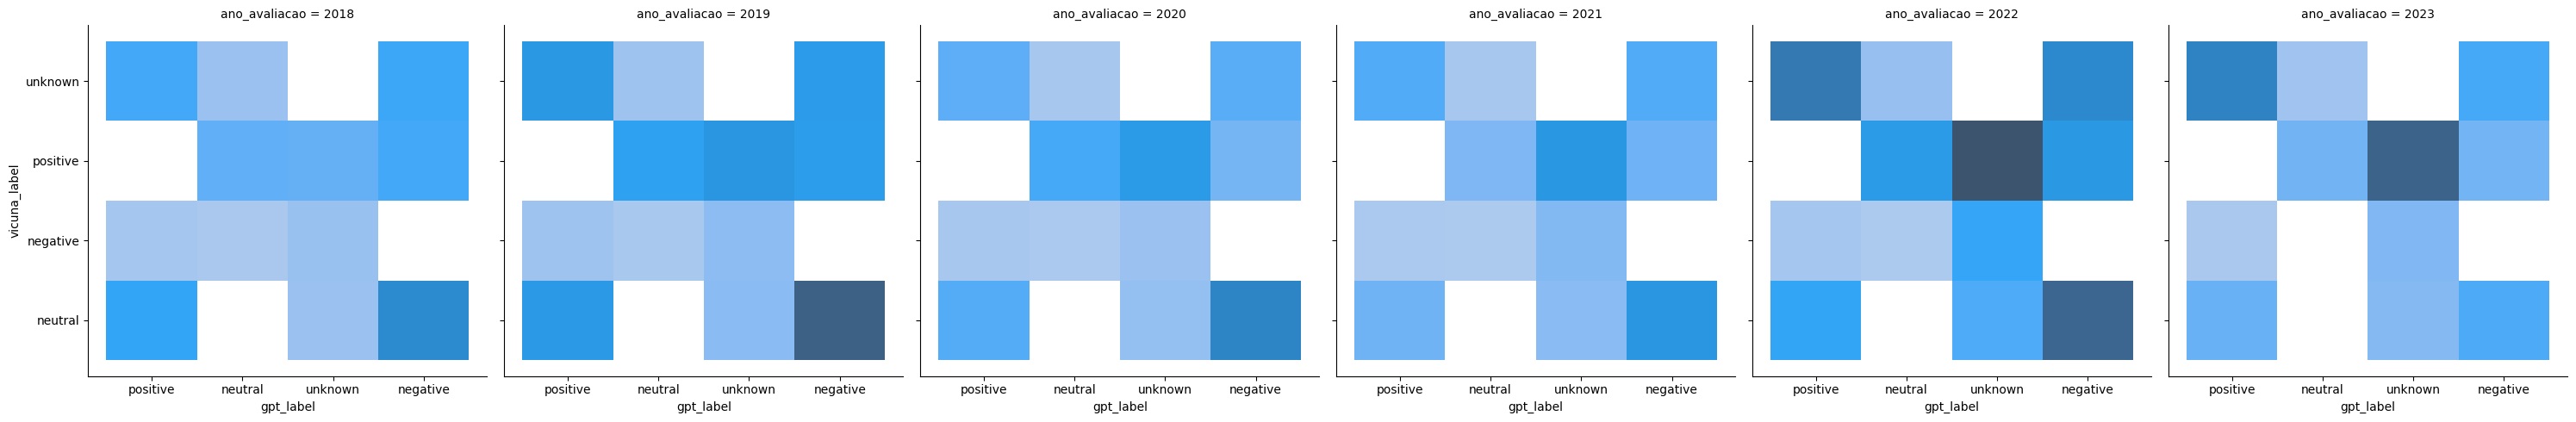

In [182]:
sns.displot(x='gpt_label', y='vicuna_label', col='ano_avaliacao', data=teste[False == teste['vicuna_gpt_match']])

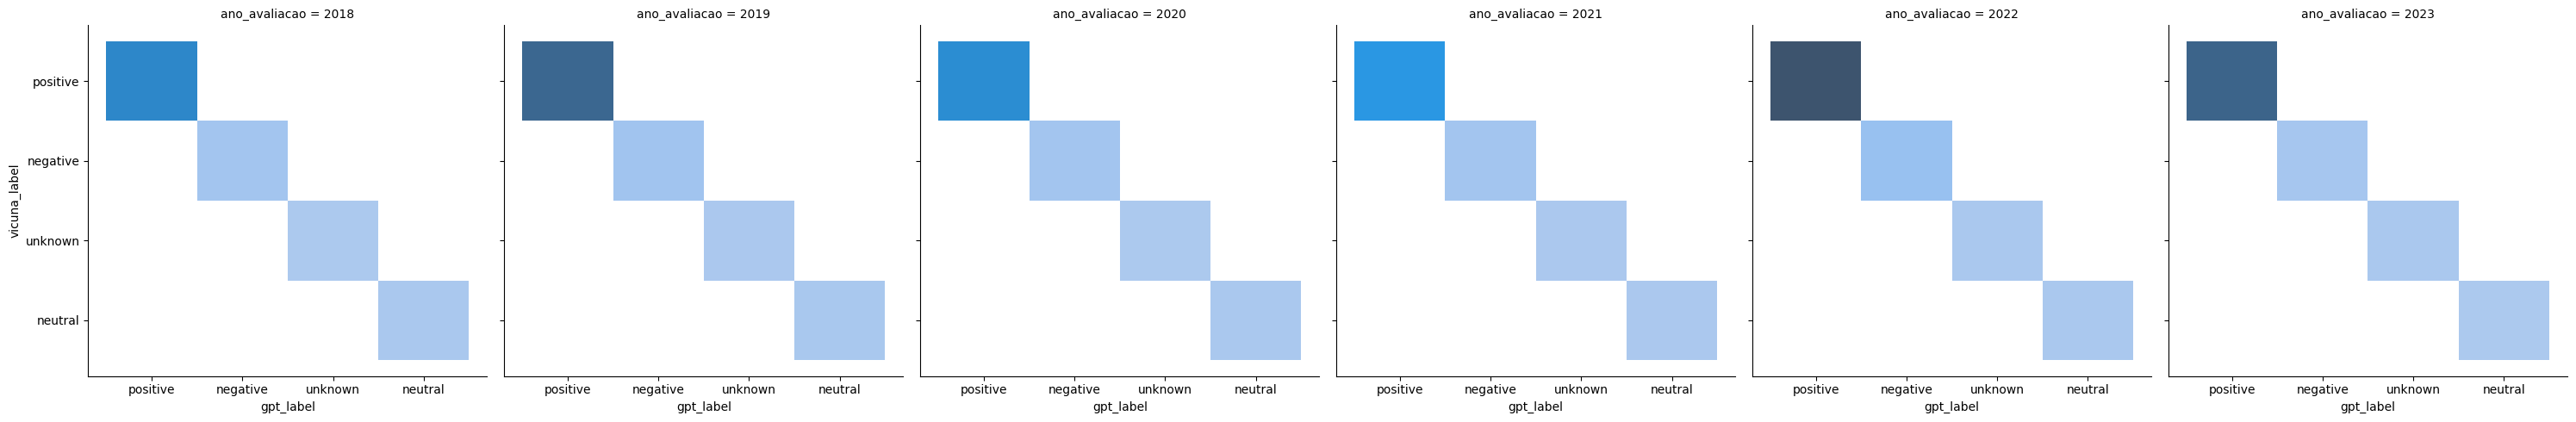

In [183]:
sns.displot(x='gpt_label', y='vicuna_label', col='ano_avaliacao', data=teste[teste['vicuna_gpt_match']])

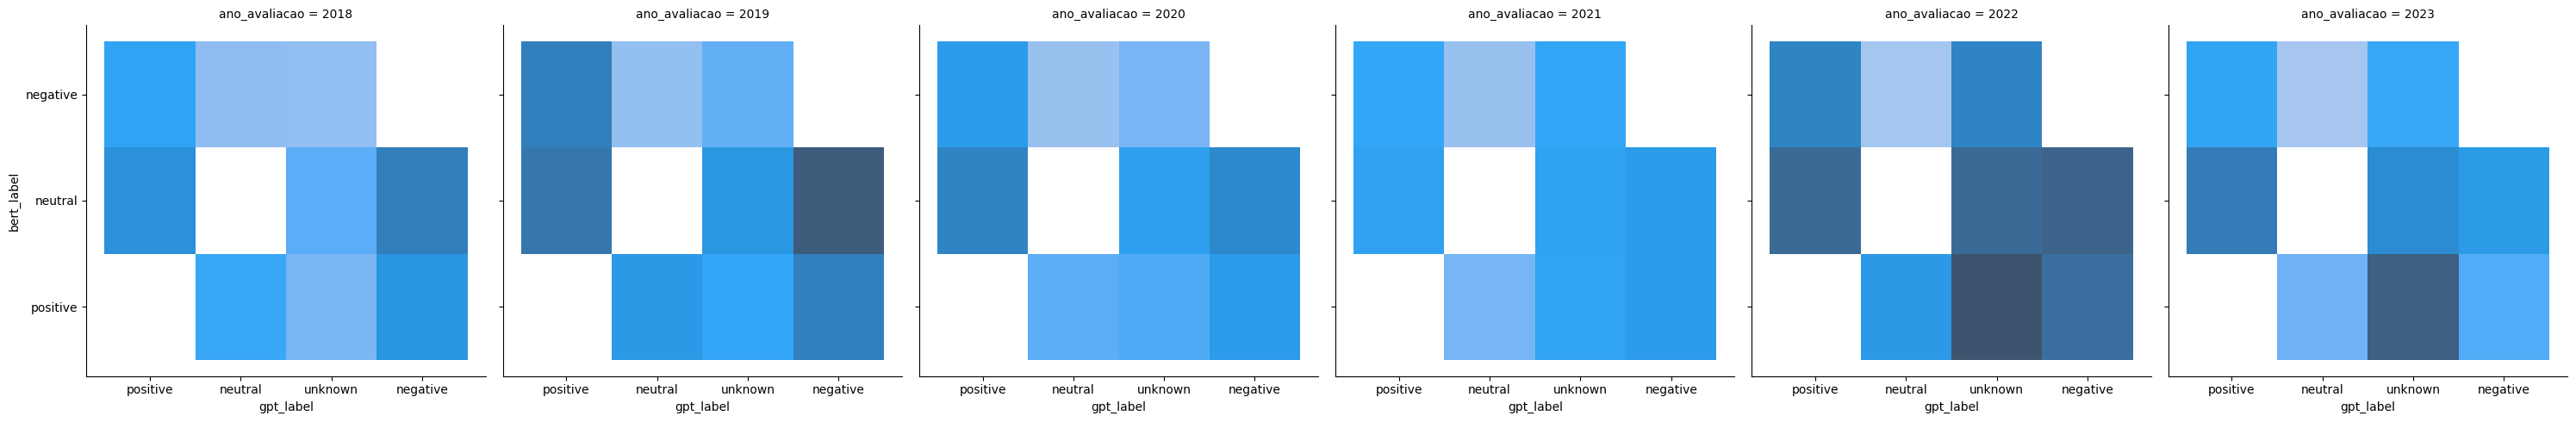

In [ ]:
sns.displot(x='gpt_label', y='bert_label', col='ano_avaliacao', data=teste[False == teste['bert_gpt_match']])

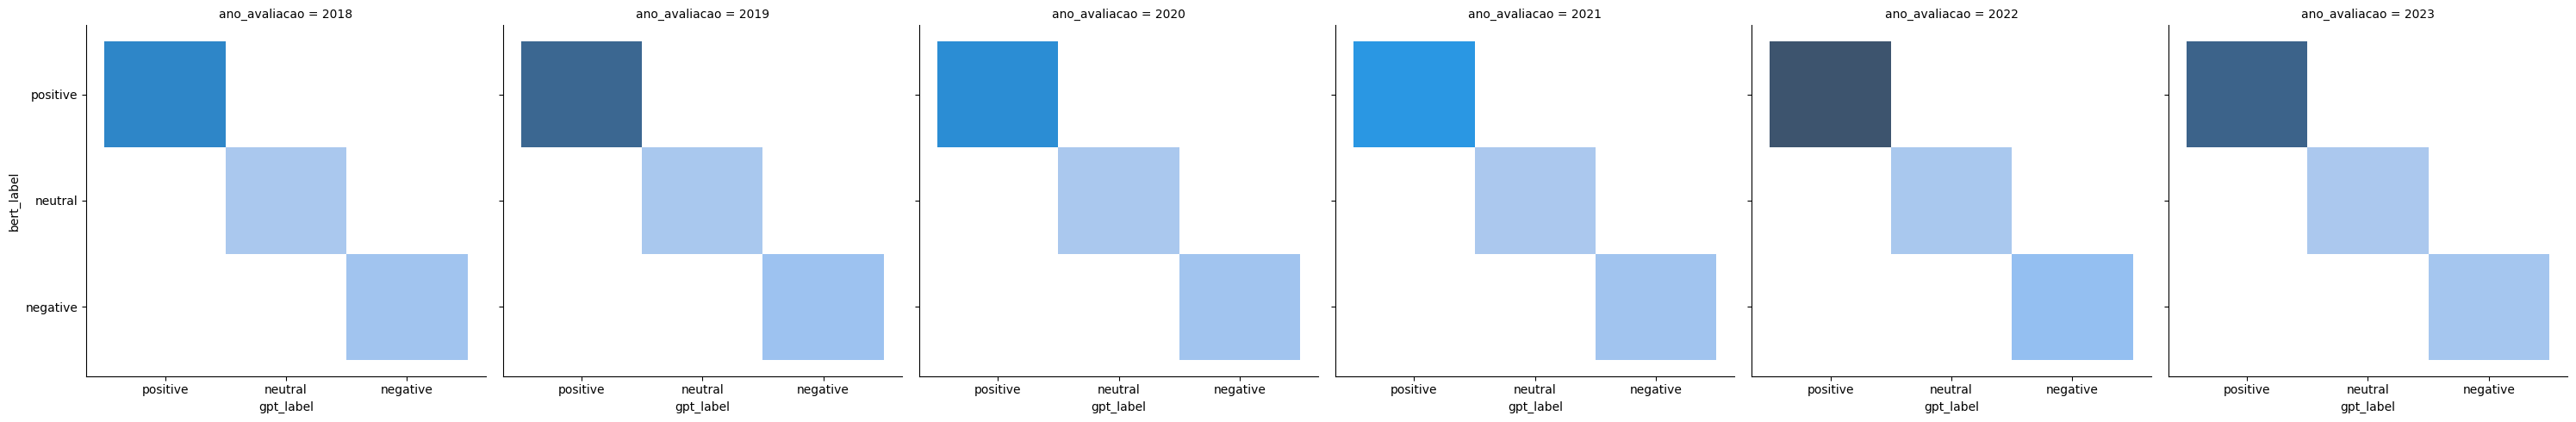

In [ ]:
sns.displot(x='gpt_label', y='bert_label', col='ano_avaliacao', data=teste[teste['bert_gpt_match']])

In [185]:
filtro = (False == teste['bert_gpt_match']) & (teste['resultado_gpt'] != 3)

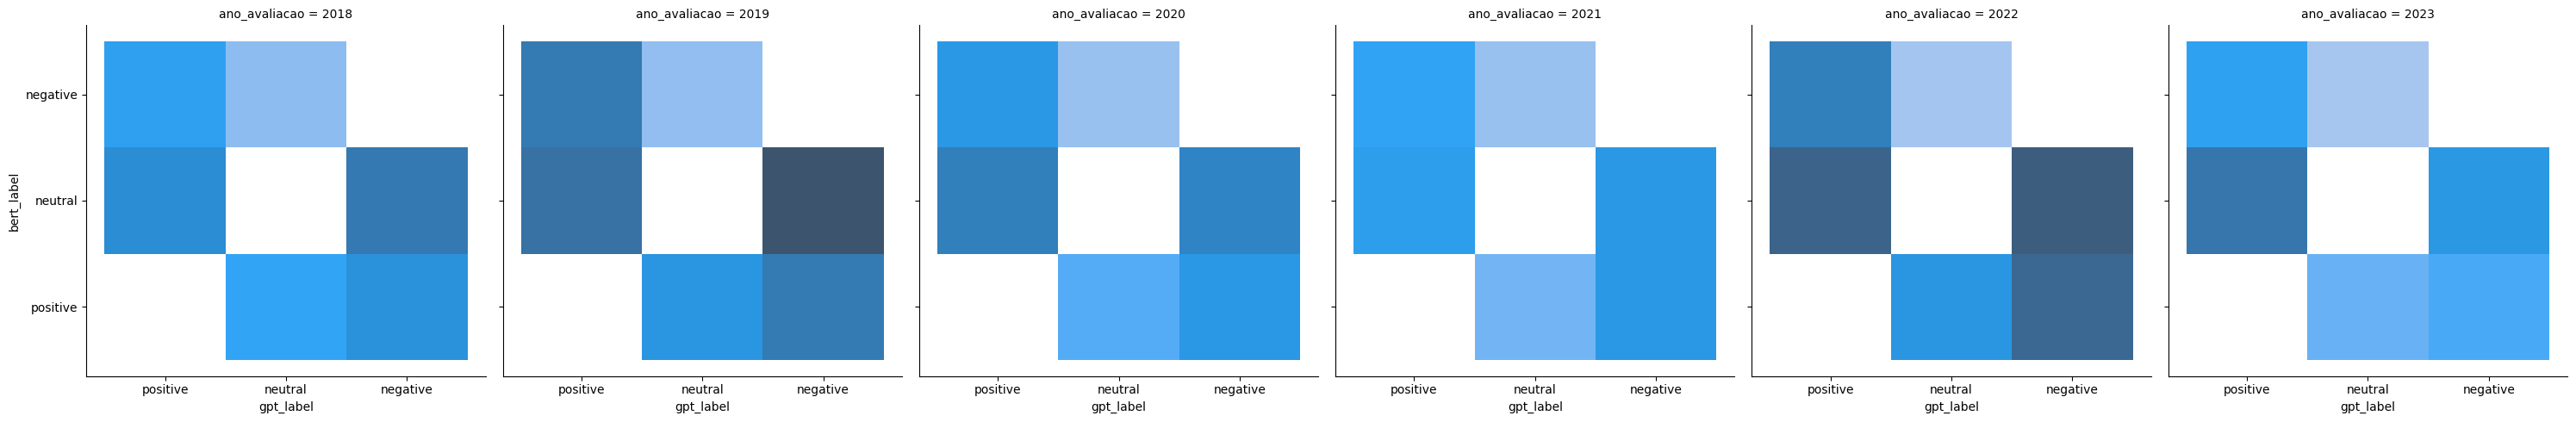

In [186]:
sns.displot(x='gpt_label', y='bert_label', col='ano_avaliacao', data=teste[filtro])

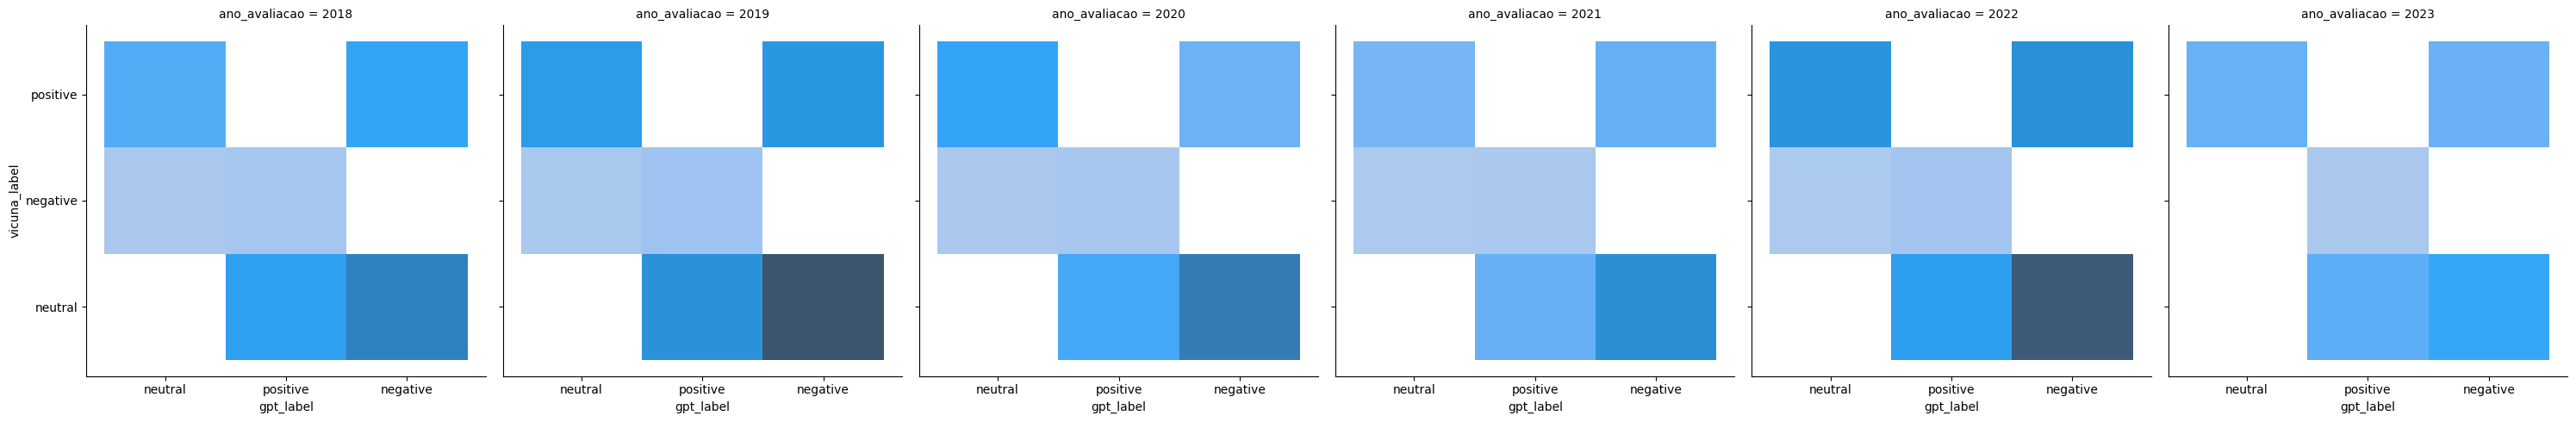

In [189]:
sns.displot(x='gpt_label', y='vicuna_label', col='ano_avaliacao', data=teste[(False == teste['vicuna_gpt_match']) & (teste['resultado_gpt'] != 3)& (teste['resultado_vicuna'] != 3)])

<Axes: xlabel='ano_avaliacao', ylabel='count'>

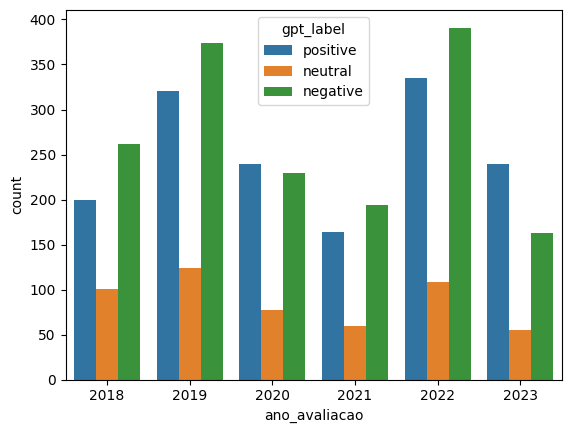

In [192]:
sns.countplot(x='ano_avaliacao', hue='gpt_label', data=teste[filtro])

<Axes: xlabel='ano_avaliacao', ylabel='count'>

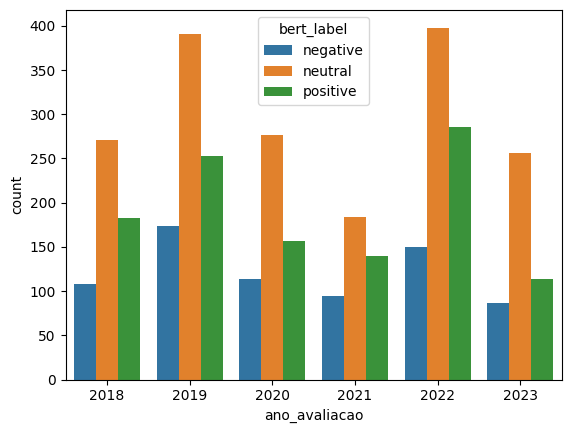

In [191]:
sns.countplot(x='ano_avaliacao', hue='bert_label', data=teste[filtro])

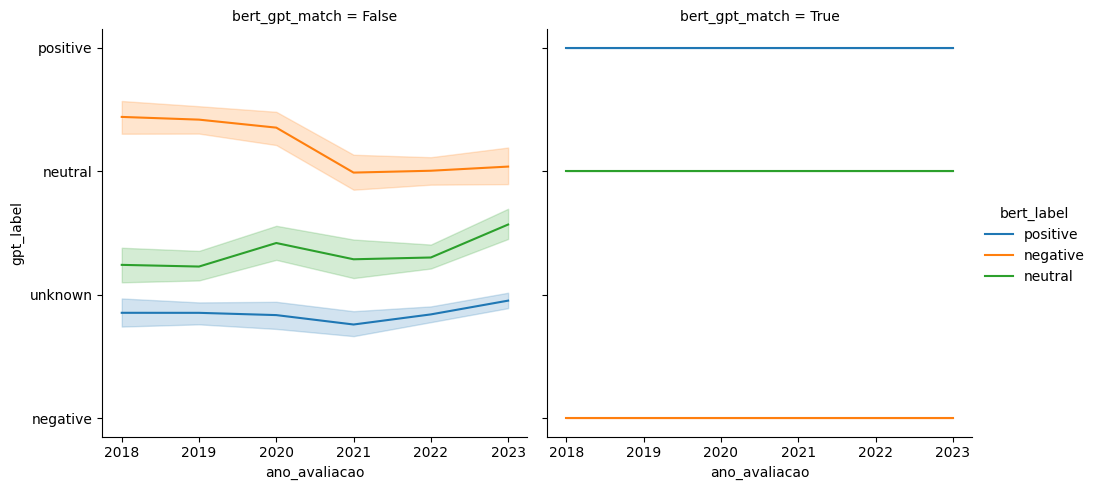

In [193]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='bert_label', col="bert_gpt_match", data=teste, kind='line')

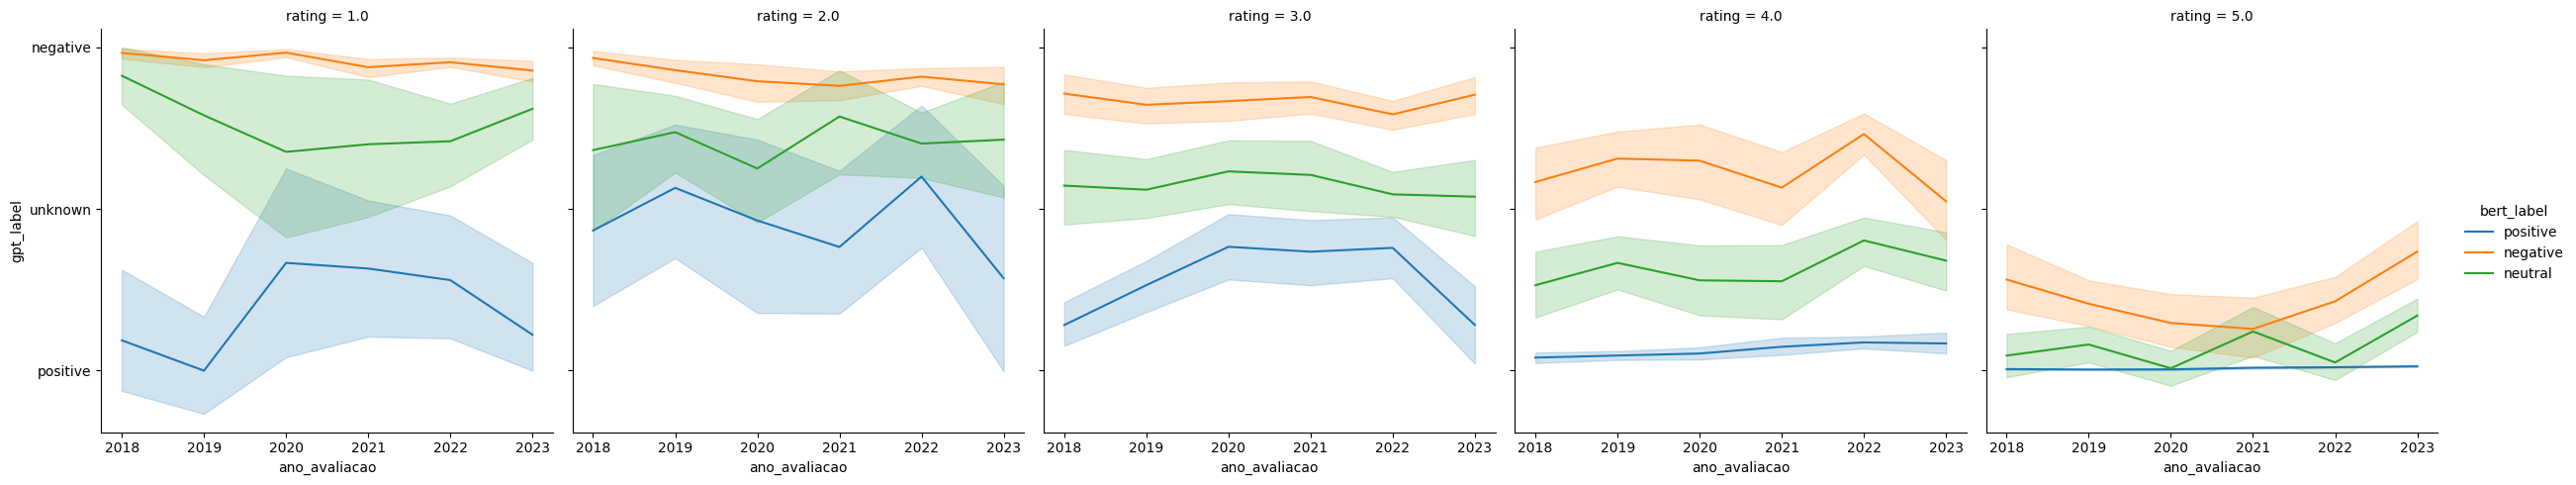

In [ ]:
sns.relplot(x='ano_avaliacao', col_wrap=5, col="rating", y='gpt_label', hue='bert_label', data=teste, kind='line')

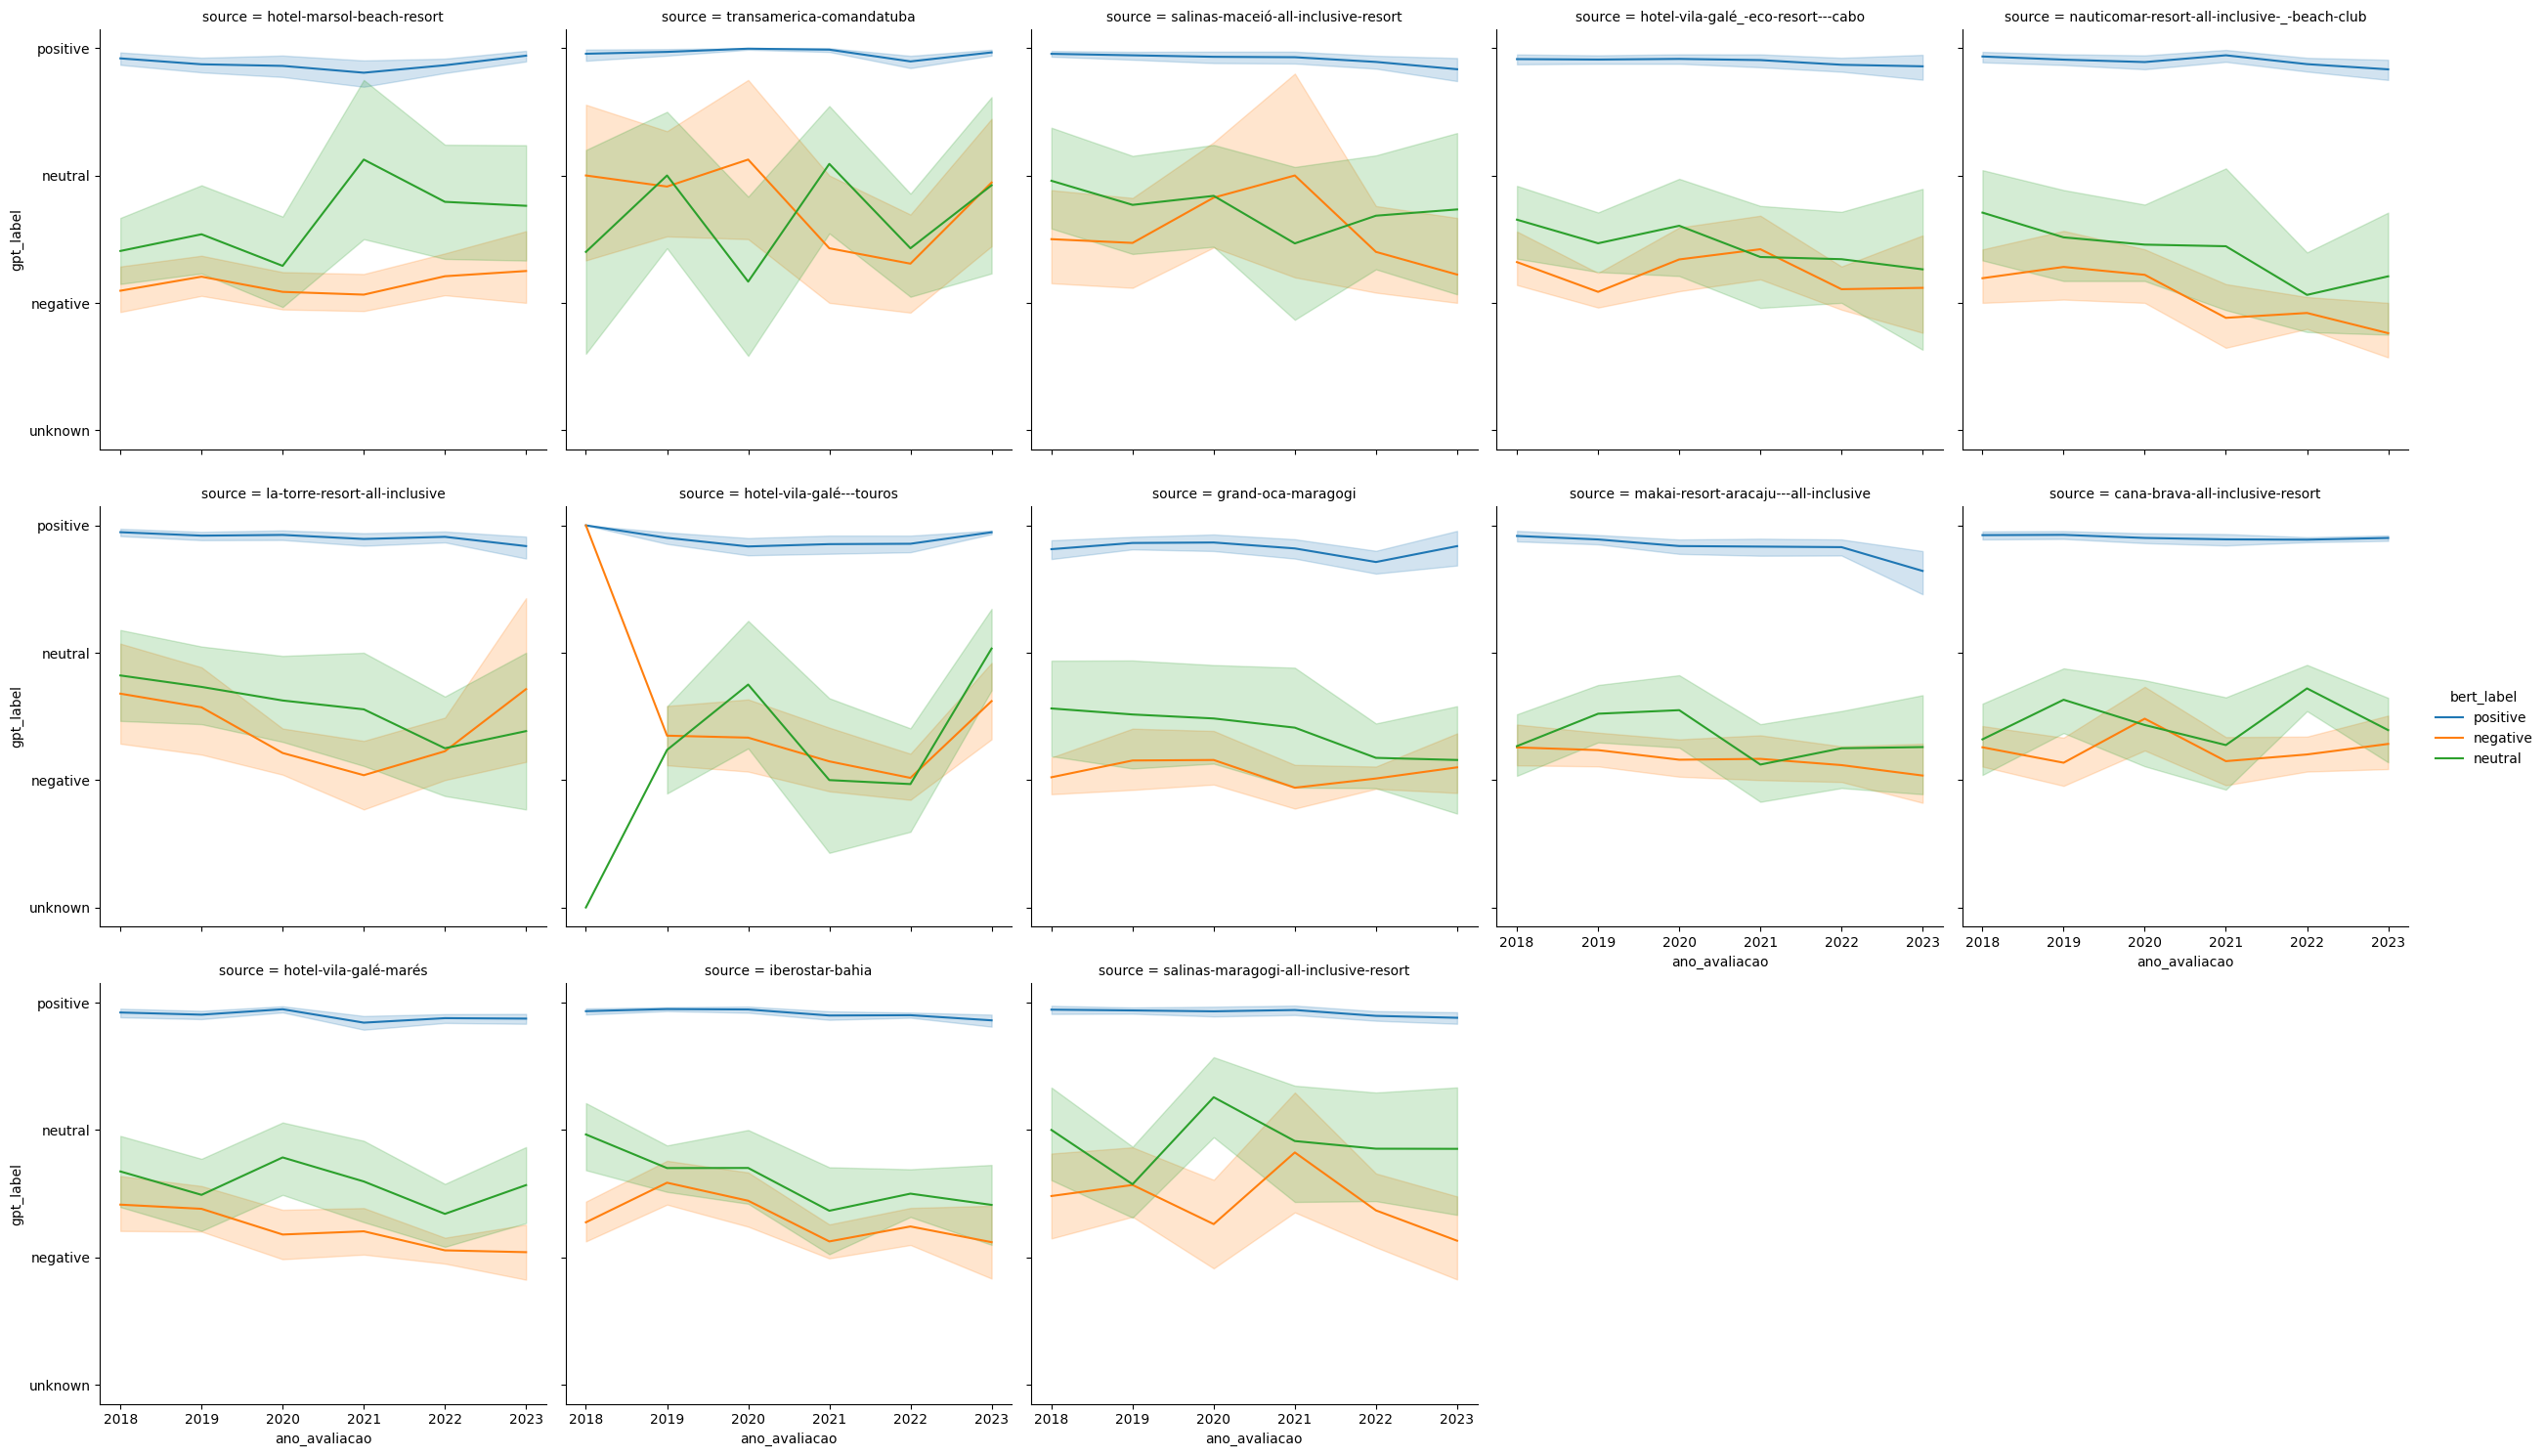

In [ ]:
sns.relplot(x='ano_avaliacao', col_wrap=5, col="source", y='gpt_label', hue='bert_label', data=teste, kind='line')

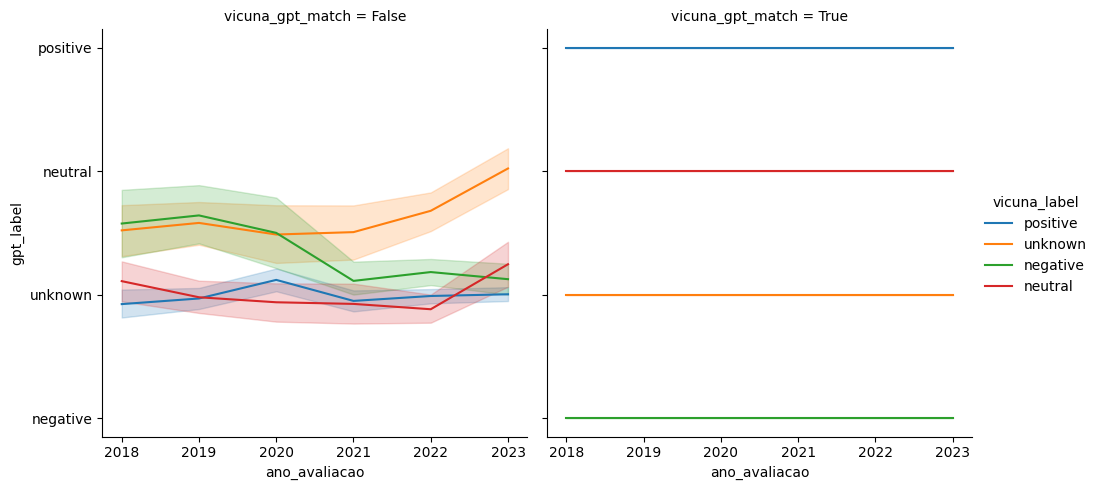

In [194]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='vicuna_label', col="vicuna_gpt_match", data=teste, kind='line')

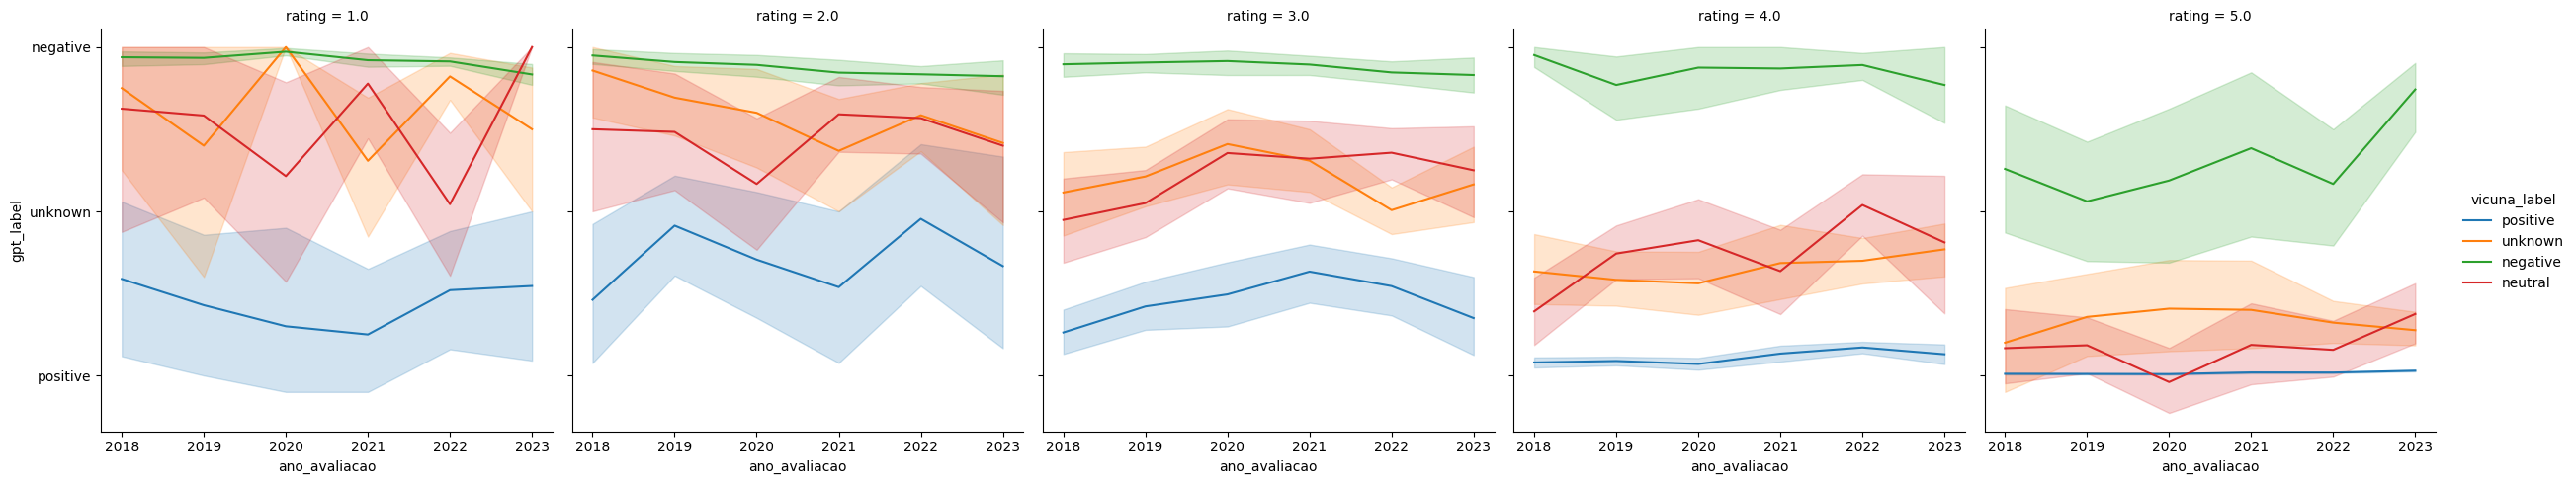

In [195]:
sns.relplot(x='ano_avaliacao', col_wrap=5, col="rating", y='gpt_label', hue='vicuna_label', data=teste, kind='line')

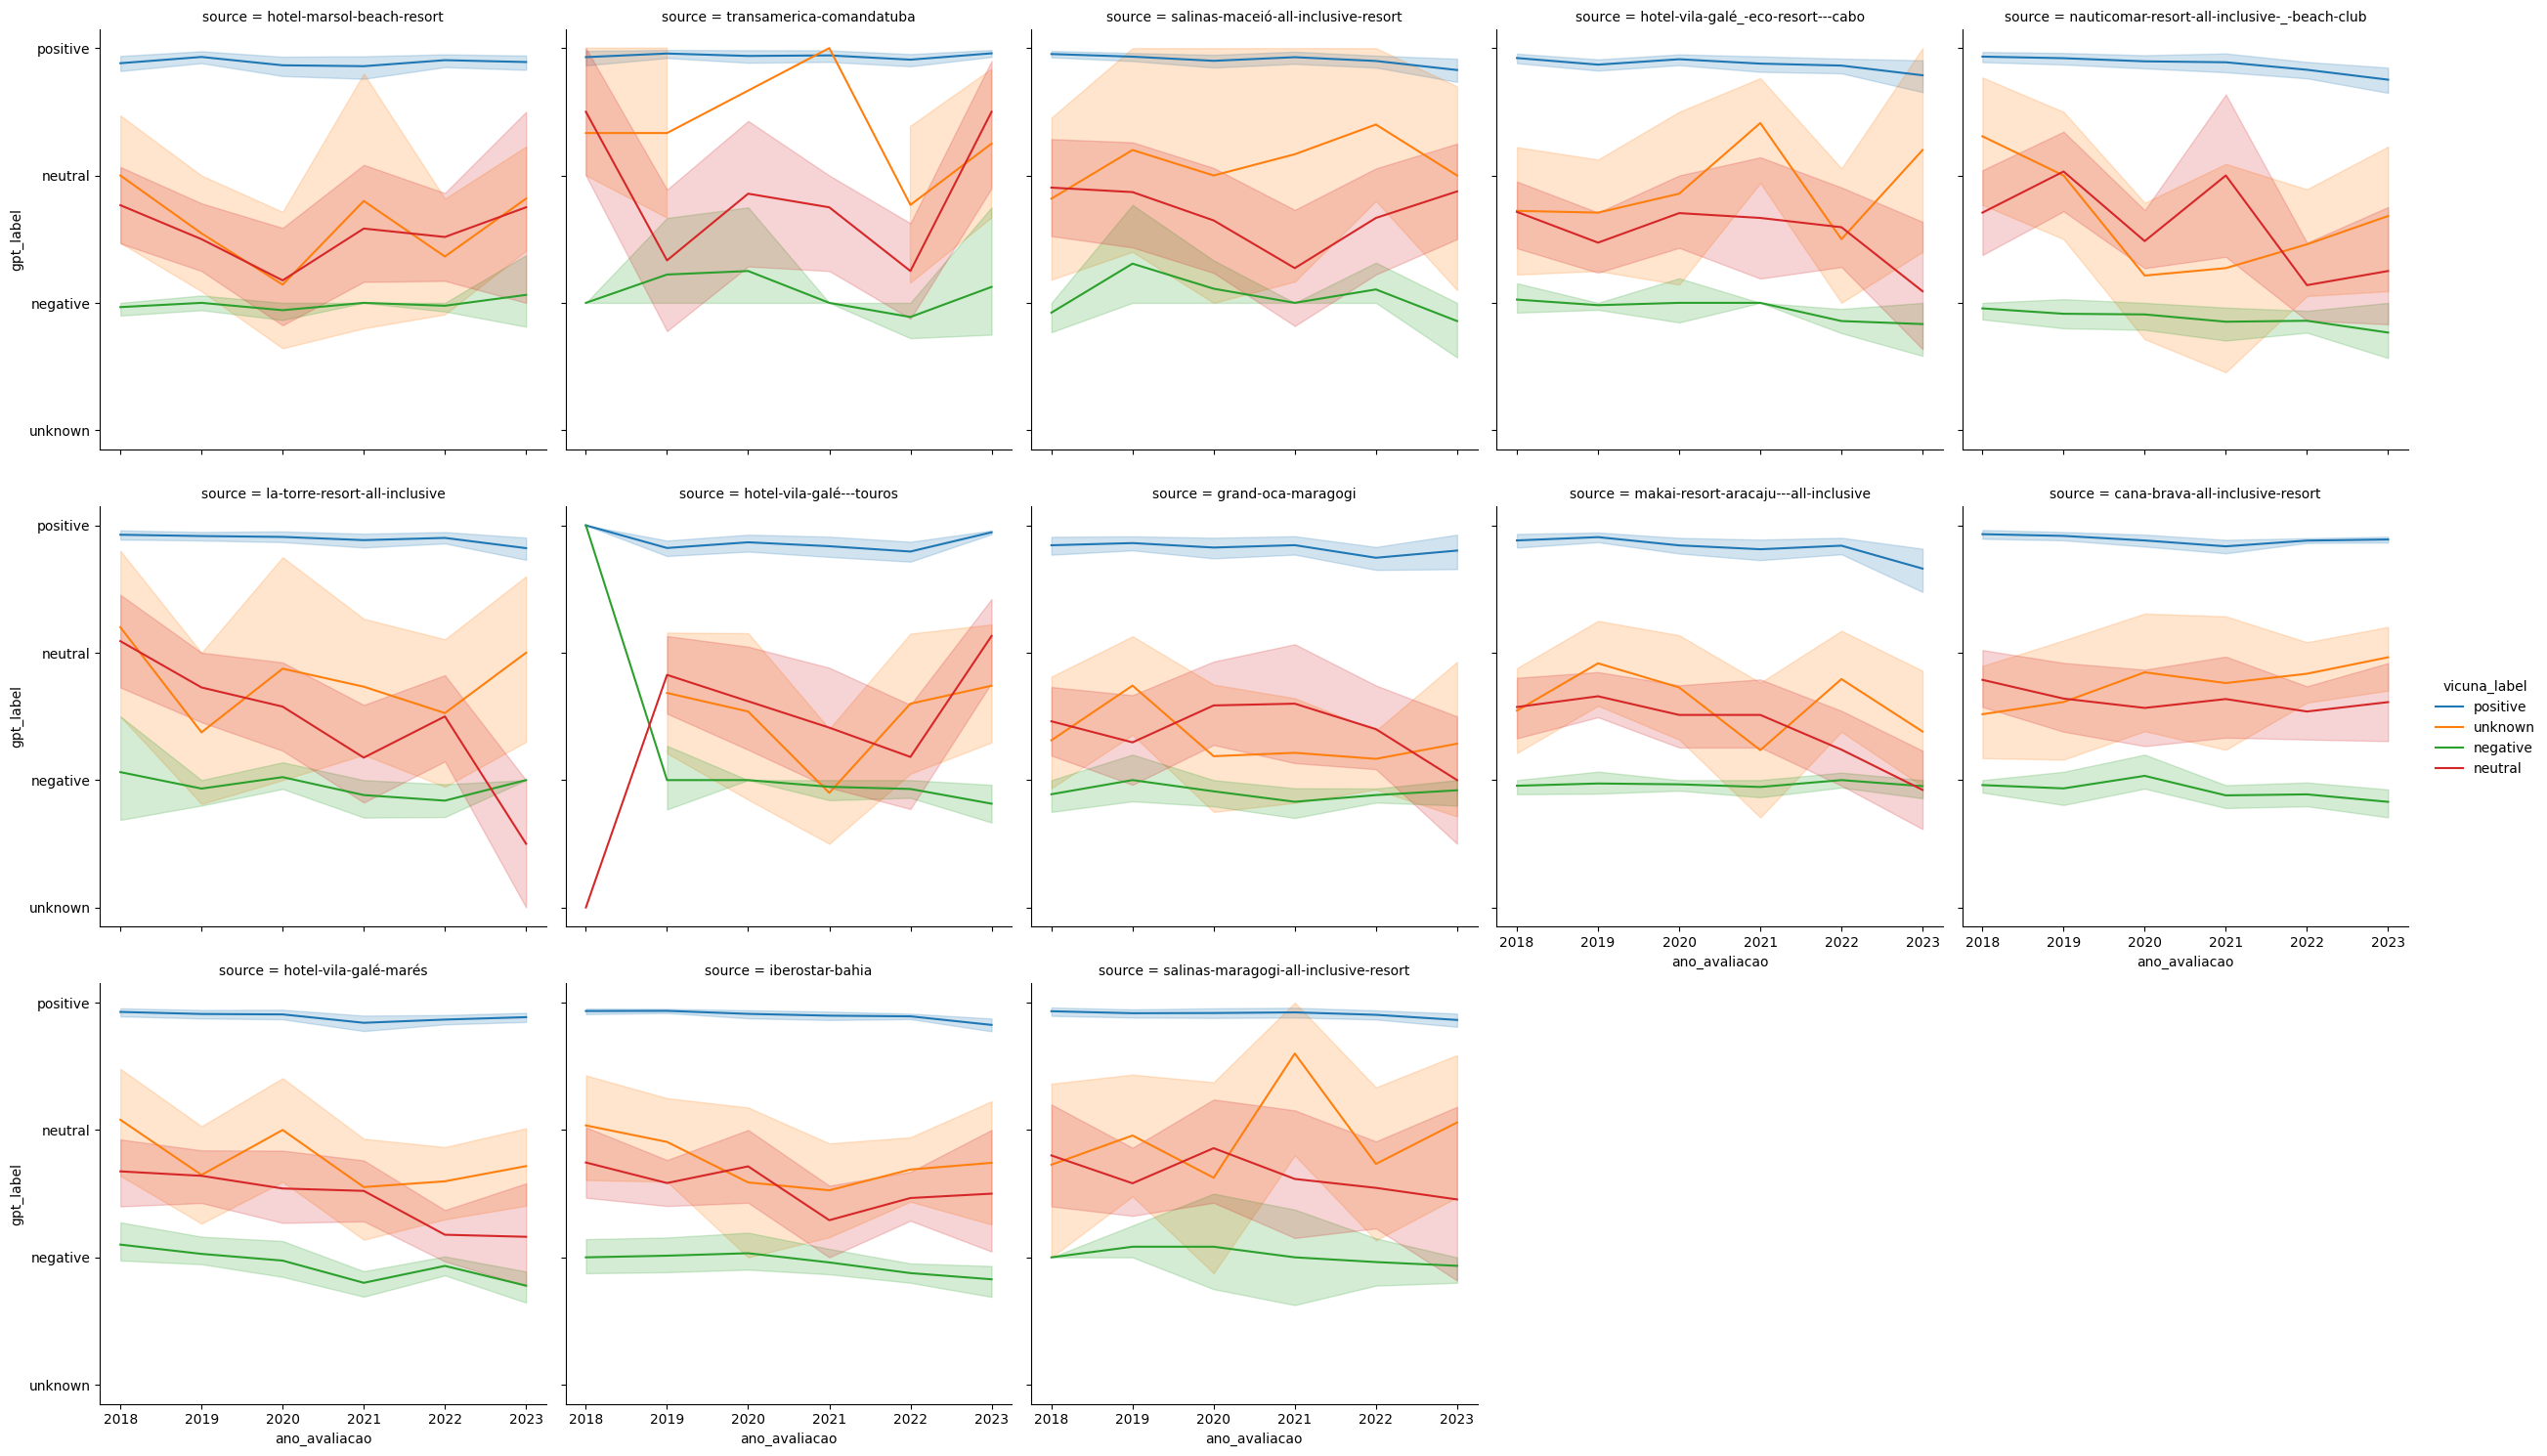

In [196]:
sns.relplot(x='ano_avaliacao', col_wrap=5, col="source", y='gpt_label', hue='vicuna_label', data=teste, kind='line')

In [ ]:
teste[teste['sentiment_label'].apply(lambda x: len(x) == 1)][['sentiment_label', 'rating', 'text', 'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4','sentiment_bert_5', 'gpt_label']]

,sentiment_label,rating,text,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,gpt_label
0,[positive],5.0,"Lugar fantástico, recomendo super.","{'label': 'positive', 'score': 0.9849022030830...","{'label': 'positive', 'score': 0.9592684507369...","{'label': 'positive', 'score': 0.9925462603569...","{'label': 'positive', 'score': 0.9392898678779...","{'label': 'positive', 'score': 0.936265766620636}",positive
2,[positive],5.0,excelente!,"{'label': 'positive', 'score': 0.9857670068740...","{'label': 'positive', 'score': 0.9891675710678...","{'label': 'positive', 'score': 0.9923394918441...","{'label': 'positive', 'score': 0.7664870023727...","{'label': 'positive', 'score': 0.9381666779518...",positive
3,[positive],5.0,Belo lugar.,"{'label': 'positive', 'score': 0.8551892638206...","{'label': 'positive', 'score': 0.781340479850769}","{'label': 'positive', 'score': 0.9930474162101...","{'label': 'positive', 'score': 0.9130381941795...","{'label': 'positive', 'score': 0.9350948929786...",positive
4,[positive],5.0,Ótimo local,"{'label': 'positive', 'score': 0.8495931029319...","{'label': 'positive', 'score': 0.5628671050071...","{'label': 'positive', 'score': 0.9923906922340...","{'label': 'positive', 'score': 0.8959783315658...","{'label': 'positive', 'score': 0.5224364995956...",positive
5,[positive],5.0,excelente local otima vista e hospitalidade pe...,"{'label': 'positive', 'score': 0.9734945893287...","{'label': 'positive', 'score': 0.9737055897712...","{'label': 'positive', 'score': 0.988045871257782}","{'label': 'positive', 'score': 0.8940903544425...","{'label': 'positive', 'score': 0.7696133852005...",positive
...,...,...,...,...,...,...,...,...,...
49212,[positive],5.0,Hotel maravilhoso!!!! Equipe de lazer sensacio...,"{'label': 'positive', 'score': 0.9956278800964...","{'label': 'positive', 'score': 0.9781378507614...","{'label': 'positive', 'score': 0.9922709465026...","{'label': 'positive', 'score': 0.9344256520271...","{'label': 'positive', 'score': 0.9551658034324...",positive
49213,[positive],5.0,Simplesmente amei,"{'label': 'positive', 'score': 0.727571427822113}","{'label': 'positive', 'score': 0.608471155166626}","{'label': 'positive', 'score': 0.9922024011611...","{'label': 'positive', 'score': 0.9030223488807...","{'label': 'positive', 'score': 0.8786059617996...",positive
49216,[positive],5.0,Excelente Resort,"{'label': 'positive', 'score': 0.987581729888916}","{'label': 'positive', 'score': 0.9462223052978...","{'label': 'positive', 'score': 0.9921082854270...","{'label': 'positive', 'score': 0.8081861138343...","{'label': 'positive', 'score': 0.937822163105011}",positive
49217,[positive],4.0,Lugar lindo! Ótimo para descansar.,"{'label': 'positive', 'score': 0.9002830386161...","{'label': 'positive', 'score': 0.6816404461860...","{'label': 'positive', 'score': 0.9932357668876...","{'label': 'positive', 'score': 0.9274115562438...","{'label': 'positive', 'score': 0.8857972621917...",positive


In [ ]:
teste[teste['sentiment_label'].apply(lambda x: len(x) == 2)][['sentiment_label', 'rating', 'text', 'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4','sentiment_bert_5', 'gpt_label']]

,sentiment_label,rating,text,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,gpt_label
1,"[positive, negative]",5.0,Tudo perfeito,"{'label': 'positive', 'score': 0.9701986312866...","{'label': 'negative', 'score': 0.6602097153663...","{'label': 'positive', 'score': 0.9922283291816...","{'label': 'positive', 'score': 0.8660374283790...","{'label': 'positive', 'score': 0.8999789953231...",positive
14,"[negative, positive]",5.0,Muito aconchegante,"{'label': 'negative', 'score': 0.4147743880748...","{'label': 'negative', 'score': 0.5092098712921...","{'label': 'negative', 'score': 0.9808983206748...","{'label': 'negative', 'score': 0.7344182133674...","{'label': 'positive', 'score': 0.5176873207092...",positive
17,"[neutral, positive]",5.0,"Quadra, piscina, praça e ao lado da praia sem ...","{'label': 'neutral', 'score': 0.5129052996635437}","{'label': 'positive', 'score': 0.5697891712188...","{'label': 'neutral', 'score': 0.6083300113677979}","{'label': 'neutral', 'score': 0.4814223349094391}","{'label': 'positive', 'score': 0.9675008654594...",positive
19,"[positive, negative]",5.0,É um ótimo hotel para levar a família e curtir...,"{'label': 'positive', 'score': 0.9578593969345...","{'label': 'negative', 'score': 0.5199328660964...","{'label': 'positive', 'score': 0.9722692966461...","{'label': 'positive', 'score': 0.9056825041770...","{'label': 'positive', 'score': 0.5757339000701...",positive
22,"[positive, neutral]",5.0,Atendimento e alimentação.,"{'label': 'positive', 'score': 0.8624117374420...","{'label': 'positive', 'score': 0.7141097187995...","{'label': 'neutral', 'score': 0.9898031949996948}","{'label': 'neutral', 'score': 0.8557446599006653}","{'label': 'positive', 'score': 0.5972226858139...",neutral
...,...,...,...,...,...,...,...,...,...
49200,"[positive, negative]",5.0,Pelo atenção e atendimento em todos os sentido...,"{'label': 'positive', 'score': 0.9378687739372...","{'label': 'negative', 'score': 0.5224962830543...","{'label': 'positive', 'score': 0.9896613359451...","{'label': 'positive', 'score': 0.883582353591919}","{'label': 'positive', 'score': 0.9030633568763...",positive
49201,"[negative, positive]",5.0,Tudo de bom,"{'label': 'negative', 'score': 0.6747020483016...","{'label': 'negative', 'score': 0.7172132730484...","{'label': 'positive', 'score': 0.9868878722190...","{'label': 'positive', 'score': 0.8054354190826...","{'label': 'positive', 'score': 0.9619171023368...",positive
49206,"[positive, neutral]",5.0,Tudo,"{'label': 'positive', 'score': 0.8212609887123...","{'label': 'positive', 'score': 0.4054795801639...","{'label': 'neutral', 'score': 0.913355827331543}","{'label': 'neutral', 'score': 0.40985575318336...","{'label': 'positive', 'score': 0.6093111634254...",unknown
49214,"[positive, negative]",5.0,"Excelente alimentação, quartos confortáveis e ...","{'label': 'positive', 'score': 0.9905057549476...","{'label': 'positive', 'score': 0.7780378460884...","{'label': 'negative', 'score': 0.9507042169570...","{'label': 'negative', 'score': 0.7147853970527...","{'label': 'positive', 'score': 0.9070519804954...",positive


In [ ]:
teste[teste['sentiment_label'].apply(lambda x: len(x) > 2)][['sentiment_label', 'rating', 'text', 'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3', 'sentiment_bert_4','sentiment_bert_5', 'gpt_label']]

,sentiment_label,rating,text,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,gpt_label
20,"[neutral, positive, negative]",3.0,"O hotel é limpo, os funcionários muito educado...","{'label': 'neutral', 'score': 0.725369930267334}","{'label': 'positive', 'score': 0.507336437702179}","{'label': 'negative', 'score': 0.5601344108581...","{'label': 'negative', 'score': 0.7183690667152...","{'label': 'negative', 'score': 0.6584920287132...",positive
39,"[positive, neutral, negative]",5.0,Sem palavras,"{'label': 'positive', 'score': 0.3510648608207...","{'label': 'neutral', 'score': 0.4789133667945862}","{'label': 'negative', 'score': 0.7170167565345...","{'label': 'negative', 'score': 0.5785571932792...","{'label': 'positive', 'score': 0.9411648511886...",neutral
57,"[neutral, negative, positive]",5.0,Lugar incrível,"{'label': 'neutral', 'score': 0.510798990726471}","{'label': 'negative', 'score': 0.4616160988807...","{'label': 'positive', 'score': 0.9919718503952...","{'label': 'positive', 'score': 0.864551842212677}","{'label': 'positive', 'score': 0.9519617557525...",positive
130,"[neutral, negative, positive]",5.0,Lugar incrível,"{'label': 'neutral', 'score': 0.510798990726471}","{'label': 'negative', 'score': 0.4616160988807...","{'label': 'positive', 'score': 0.9919718503952...","{'label': 'positive', 'score': 0.864551842212677}","{'label': 'positive', 'score': 0.9519617557525...",positive
132,"[neutral, negative, positive]",3.0,"Difícil dizer,por que amo praia e é um lugar q...","{'label': 'neutral', 'score': 0.45937931537628...","{'label': 'negative', 'score': 0.4774778187274...","{'label': 'positive', 'score': 0.9845324158668...","{'label': 'positive', 'score': 0.8982284665107...","{'label': 'positive', 'score': 0.9264105558395...",positive
...,...,...,...,...,...,...,...,...,...
49140,"[negative, positive, neutral]",4.0,"Passamos só 4 dias no Salinas, pois era só o q...","{'label': 'negative', 'score': 0.9009762406349...","{'label': 'positive', 'score': 0.5664177536964...","{'label': 'neutral', 'score': 0.9686949849128723}","{'label': 'neutral', 'score': 0.3812373876571655}","{'label': 'positive', 'score': 0.750812828540802}",positive
49142,"[neutral, negative, positive]",4.0,"Muito bom, mas acho que não é o melhor App inc...","{'label': 'neutral', 'score': 0.4654511511325836}","{'label': 'negative', 'score': 0.736460268497467}","{'label': 'negative', 'score': 0.6970648169517...","{'label': 'negative', 'score': 0.6932324767112...","{'label': 'positive', 'score': 0.6773813366889...",neutral
49191,"[negative, positive, neutral]",4.0,Comida é excelente. Mas me decepcionei com as ...,"{'label': 'negative', 'score': 0.5389358997344...","{'label': 'positive', 'score': 0.6376407146453...","{'label': 'negative', 'score': 0.9732257127761...","{'label': 'negative', 'score': 0.9444505572319...","{'label': 'neutral', 'score': 0.7535067200660706}",negative
49192,"[positive, negative, neutral]",2.0,"ola, Estive agora em junho de 2017, de boa na...","{'label': 'positive', 'score': 0.5947734117507...","{'label': 'negative', 'score': 0.5397107005119...","{'label': 'neutral', 'score': 0.7206991910934448}","{'label': 'negative', 'score': 0.7116811275482...","{'label': 'negative', 'score': 0.4659240841865...",negative


In [ ]:
teste[teste.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'sentiment_label', 'sentiment_bert', 'rating', 'text', 'source', 'gpt_label']]

,relative_date,likes,mes_ano_avaliacao,sentiment_label,sentiment_bert,rating,text,source,gpt_label
39,3 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-marsol-beach-resort,neutral
5932,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maceió-all-inclusive-resort,neutral
14076,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,la-torre-resort-all-inclusive,neutral
14548,2 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé---touros,neutral
35522,4 anos atrás,0,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé-marés,neutral
48076,4 anos atrás,1,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral
48708,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral


In [ ]:
gpt[gpt.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'sentimento_gpt', 'rating', 'text', 'source']]

,relative_date,likes,mes_ano_avaliacao,sentimento_gpt,rating,text,source
39,3 semanas atrás,0,2023-06,neutral,5.0,Sem palavras,hotel-marsol-beach-resort
5932,5 anos atrás,0,2018-07,neutral,5.0,Sem palavras,salinas-maceió-all-inclusive-resort
14076,5 anos atrás,0,2018-07,neutral,5.0,Sem palavras,la-torre-resort-all-inclusive
14548,2 semanas atrás,0,2023-06,neutral,5.0,Sem palavras,hotel-vila-galé---touros
35522,4 anos atrás,0,2019-07,neutral,5.0,Sem palavras,hotel-vila-galé-marés
48076,4 anos atrás,1,2019-07,neutral,5.0,Sem palavras,salinas-maragogi-all-inclusive-resort
48708,5 anos atrás,0,2018-07,neutral,5.0,Sem palavras,salinas-maragogi-all-inclusive-resort


In [ ]:
teste[(gpt['sentimento_gpt'] == 'neutral') & (teste['bert_label'] != 'neutral')]

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_label,sentiment_score,sentiment_bert_max,gpt_label,bert_label,citizenlab_bert_label,philschmid_bert_label,bert_gpt_match,citizenlab_gpt_match,philschmid_gpt_match
39,2023-07-07 00:34:00.764112,5.0,3 semanas atrás,0,False,Sem palavras,hotel-marsol-beach-resort,6,2023-06-16,6,...,"[positive, neutral, negative]","{0.35106486082077026, 0.4789133667945862, 0.94...",ramonmedeiro1/bertimbau-products-reviews-pt-br,neutral,positive,negative,positive,False,False,False
180,2023-07-07 00:34:18.978245,3.0,um mês atrás,0,True,Funcionários extremamente acolhedores e hospit...,hotel-marsol-beach-resort,101,2023-06-07,6,...,"[positive, negative, neutral]","{0.7346953749656677, 0.717691957950592, 0.5954...",philschmid/distilbert-base-multilingual-cased-...,neutral,positive,neutral,positive,False,True,False
301,2023-07-07 00:34:36.545694,5.0,5 meses atrás,0,False,Tudo muito bom. As bebidas poderiam ser mais ...,hotel-marsol-beach-resort,3,2023-02-07,2,...,"[neutral, positive]","{0.6364243030548096, 0.8441052436828613, 0.836...",citizenlab/twitter-xlm-roberta-base-sentiment-...,neutral,positive,positive,neutral,False,False,True
409,2023-07-07 00:34:52.994538,5.0,9 meses atrás,0,False,Gostei de tudo. Precisa melhorar as refeições...,hotel-marsol-beach-resort,Um,2022-10-10,10,...,[positive],"{0.5731281042098999, 0.774587094783783, 0.6688...",citizenlab/twitter-xlm-roberta-base-sentiment-...,neutral,positive,positive,positive,False,False,False
480,2023-07-07 00:35:05.084469,3.0,um ano atrás,0,True,"Muito bom o atendimento pelo funcionários, no ...",hotel-marsol-beach-resort,491,2022-07-07,7,...,"[negative, positive]","{0.6353108286857605, 0.6668542623519897, 0.671...",citizenlab/twitter-xlm-roberta-base-sentiment-...,neutral,negative,negative,negative,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48786,2023-07-07 01:03:09.643945,3.0,5 anos atrás,0,False,"Atendimento nota 10 praia maravilhoso , c...",salinas-maragogi-all-inclusive-resort,11,2018-07-08,7,...,"[neutral, positive]","{0.5521454811096191, 0.7060004472732544, 0.570...",citizenlab/twitter-xlm-roberta-base-sentiment-...,neutral,positive,positive,neutral,False,False,True
48825,2023-07-07 01:03:17.614993,4.0,5 anos atrás,0,True,Quartos pequenos porém aconchegantes...restaur...,salinas-maragogi-all-inclusive-resort,16,2018-07-08,7,...,"[positive, negative]","{0.8220268487930298, 0.4533374011516571, 0.573...",philschmid/distilbert-base-multilingual-cased-...,neutral,positive,negative,positive,False,False,False
48860,2023-07-07 01:03:25.680253,4.0,5 anos atrás,0,True,Muita fritura. Limpo. Aconchegante. Muita recr...,salinas-maragogi-all-inclusive-resort,83,2018-07-08,7,...,"[positive, negative]","{0.7938446402549744, 0.5685210227966309, 0.632...",citizenlab/twitter-xlm-roberta-base-sentiment-...,neutral,negative,negative,positive,False,False,False
48921,2023-07-07 01:03:37.267638,4.0,5 anos atrás,0,True,"Bom lugar para ir com a família, mas a aliment...",salinas-maragogi-all-inclusive-resort,49,2018-07-08,7,...,"[neutral, negative]","{0.4809128940105438, 0.6094832420349121, 0.825...",citizenlab/twitter-xlm-roberta-base-sentiment-...,neutral,negative,negative,neutral,False,False,True


<Axes: xlabel='tokens_gpt', ylabel='count'>

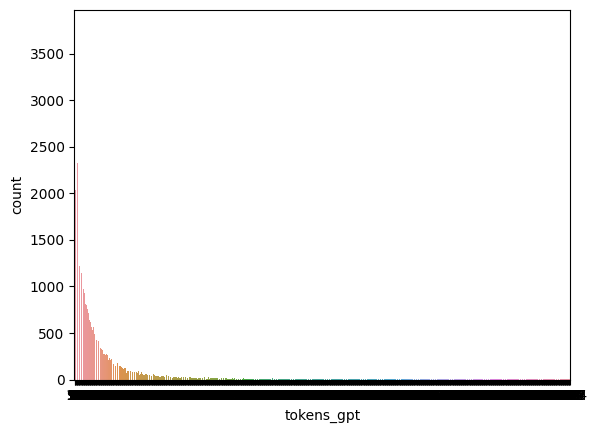

In [197]:
sns.countplot(x='tokens_gpt', data=teste)

<Axes: xlabel='tokens_vicuna', ylabel='count'>

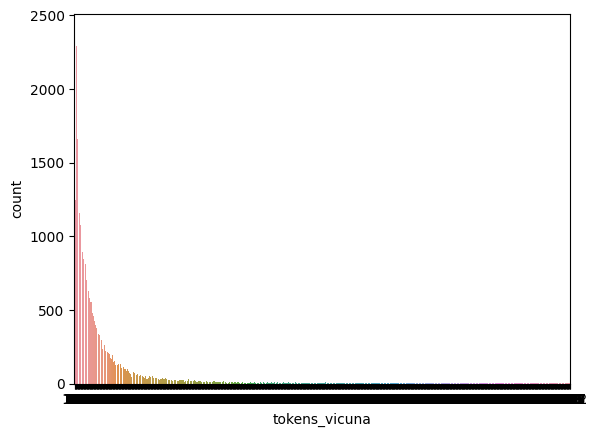

In [198]:
sns.countplot(x='tokens_vicuna', data=teste)

In [200]:
teste_copy = teste.copy()

In [204]:
teste_copy[['tokens_vicuna', 'tokens_gpt']]

,tokens_vicuna,tokens_gpt
0,147,102
1,141,97
2,139,95
3,140,96
4,140,97
...,...,...
49214,186,136
49215,140,96
49216,140,96
49217,150,106


In [227]:
teste_copy['tokens_gpt'].max()

1744

<Axes: xlabel='Proportion', ylabel='tokens_vicuna'>

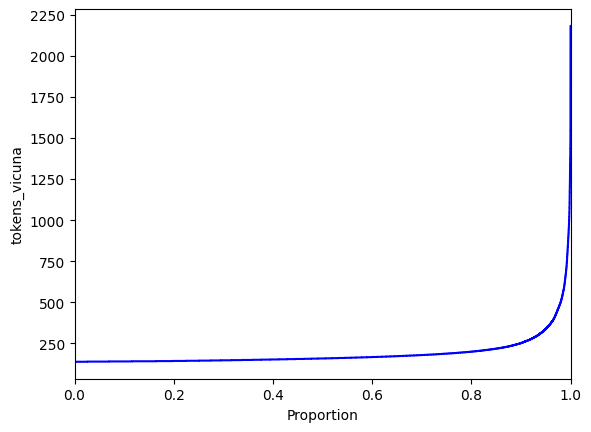

In [225]:
sns.ecdfplot(y='tokens_vicuna', data=teste_copy, label='vicuna', color='blue')


<Axes: xlabel='Proportion', ylabel='tokens_gpt'>

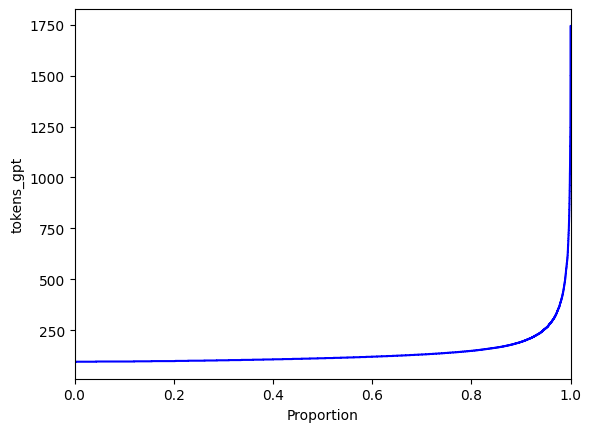

In [224]:
sns.ecdfplot(y='tokens_gpt', data=teste_copy, label='vicuna', color='blue')


<Axes: ylabel='Proportion'>

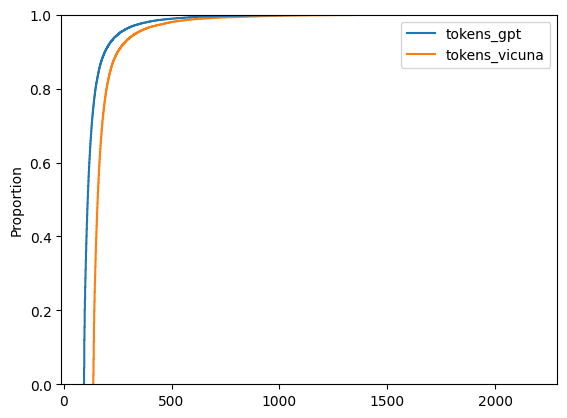

In [235]:
sns.ecdfplot(data=teste_copy.filter(like="tokens_", axis="columns"))

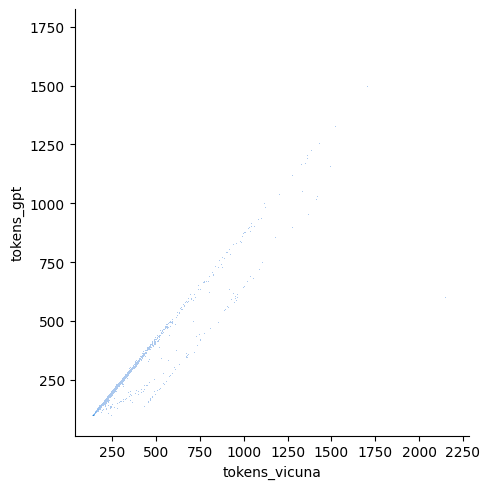

In [244]:
sns.displot(data=teste_copy.filter(like="tokens_", axis="columns"), x="tokens_vicuna", y="tokens_gpt")

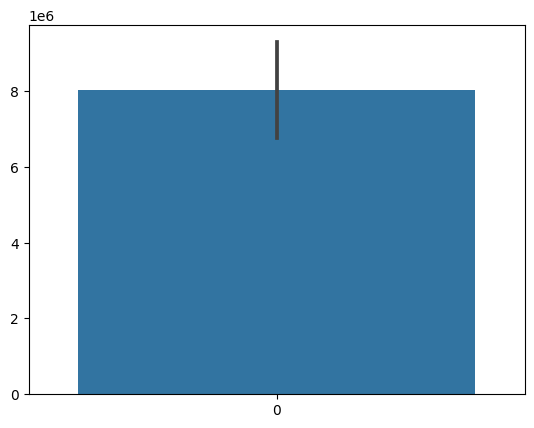

In [279]:
ax = sns.barplot()
ax.bar_label(ax.containers[0], fontsize=10);

<Axes: >

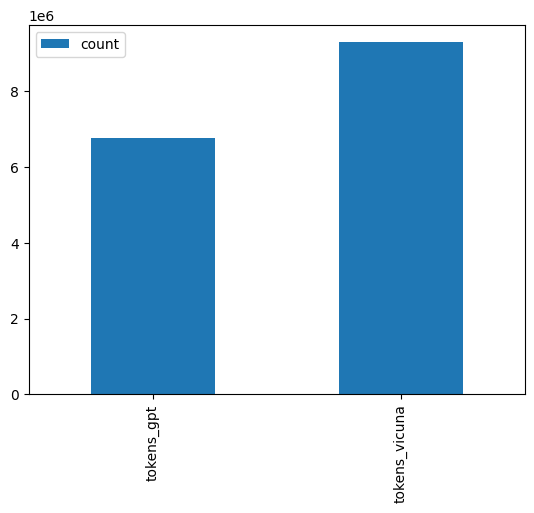

In [285]:
pd.DataFrame(teste_copy[['tokens_gpt','tokens_vicuna']].sum(), columns=['count']).plot.bar()